In [2]:
# import re
# import os
# import sys
# import pwd
# import glob as glob

# # analysis
# import pandas as pd
# import numpy as np
# import math

# # plotting 
# import seaborn as sns
# import matplotlib.pyplot as plt
# from matplotlib.pyplot import cm 

# %matplotlib inline 
# import altair as alt
# # alt.renderers.enable('html')
# import plotnine as pn

# # gh specific
# sys.path.append('/ghess/pharma/shared_scripts/')
# import bibp.functions as functions
# import hgvslib.pHGVS as pHGVS  ## do a pull on the hgvslib git repo

# pd.options.display.max_columns  =  1000
# pd.set_option('max_colwidth', 100)
# pd.options.display.max_rows=1000
# pd.options.display.max_colwidth = 1000

# alt.renderers.enable('mimetype') # https://altair-viz.github.io/user_guide/display_frontends.html#displaying-in-jupyterlab

# sns.set_palette("colorblind")
# sns.set_context("talk")
# plt.rcParams["axes.labelweight"] = "bold"


In [1]:
import io
import subprocess
import os
import glob

import pandas as pd
import numpy as np
import scipy
import scipy.stats as stats
from sklearn.decomposition import PCA
import pickle
import re
import math
import plotnine as pn
import seaborn as sns
import glob
import subprocess
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from numpy import log
from collections import defaultdict,Counter
import re
import statsmodels
import warnings

# !pip install statannotations==0.4.0
# #!pip uninstall statannotations --yes
# from statannotations.Annotator import Annotator

warnings.filterwarnings("ignore")
pd.options.display.max_rows = None
pd.options.display.max_columns=None
pd.options.display.max_colwidth=None
# work_dir="/ghess/pharma/projects/sirius_pharma/hazhang_projects/MB_PanCancer_LoD_simulation_01082024"

# Important notes! Read me first!

# This Jupyter notebook was ripped off from Patrick. This ipynb was NOT used for this analysis. Instead I just used the csv file "20231218_NOC01_batch1_2_post_tb_tb_changed_all_cols_MRD.csv" to do the deep-dive which has included everything that I need. This notebook is messy and has not been organized yet! But it includes some good insights in terms of how to plot things in Infinity.

In [3]:
os.chdir(f"/home/pfiaux/prep_cohort_reports/20231215_NOC01_IST01/")

In [2]:
noc_df = pd.read_csv('/home/pfiaux/prep_cohort_reports/20231215_NOC01_IST01/20230405_NOC01_IST01_batch1&2_MRD_RUO_report_with_CRC BIP results_appended.csv')
bims_df = pd.read_csv('/home/pfiaux/prep_cohort_reports/20231215_NOC01_IST01/BIMS-87_TVF.csv')

In [3]:
display(noc_df.head())
display(bims_df.head())

,Study_ID,Customer_SampleID,GHRequestID,GHSampleID,Patient_ID,Cancertype,Tumor_stage,Visit_name,Sample_status,Sample_comment,cfDNA_ng_yield,Plasma_ml_input,Plasma_ml_remaining,Bloodcoll_date,Reported_date,AGGCALLER_ctDNA_detected,AGGCALLER_Tumor_methylation_status,AGGCALLER_Somatic_variant_reportable,AGGCALLER_Variant_type,AGGCALLER_Indel_type,AGGCALLER_Gene,AGGCALLER_Chromosome,AGGCALLER_Position,AGGCALLER_Exon,AGGCALER_Mut_aa,AGGCALLER_Mut_nt,AGGCALLER_Mut_cdna,AGGCALLER_Transcript,AGGCALLER_Percentage,AGGCALLER_Splice_effect,AGGCALLER_COSMIC,AGGCALLER_dbSNP,CRCCALLER_ctDNA_detected,CRCCALLER_Tumor_methylation_status,CRCCALLER_Somatic_variant_reportable,CRCCALLER_Variant_type,CRCCALLER_Indel_type,CRCCALLER_Gene,CRCCALLER_Chromosome,CRCCALLER_Position,CRCCALLER_Exon,CRCCALLER_Mut_aa,CRCCALLER_Mut_nt,CRCCALLER_Mut_cdna,CRCCALLER_Transcript,CRCCALLER_Percentage,CRCCALLER_Splice_effect,CRCCALLER_COSMIC,CRCCALLER_dbSNP
0,NO CUT,4004000001-BASELINE,A0590638,B00234320,4004000001,rectal cancer,NaN,BASELINE,SUCCESS,NaN,13.455,6.0,0,6/22/20,4/7/23,Detected,Detected,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Detected,Detected,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NO CUT,1001000002-BASELINE,A0590718,B00234194,1001000002,rectal cancer,NaN,BASELINE,SUCCESS,NaN,9.815,6.0,0,6/7/18,4/7/23,Detected,Detected,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Detected,Detected,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NO CUT,1001000002-RESTAGING #2,A0590719,B00234192,1001000002,rectal cancer,NaN,RESTAGING #2,SUCCESS,NaN,13.195,6.0,0,12/21/18,4/7/23,Not Detected,Not Detected,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Detected,Not Detected,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NO CUT,1001000004-BASELINE,A0590720,B00234205,1001000004,rectal cancer,NaN,BASELINE,SUCCESS,NaN,14.300,6.0,0,9/4/18,4/7/23,Not Detected,Not Detected,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Detected,Not Detected,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NO CUT,1001000004-RESTAGING #2,A0590721,B00234207,1001000004,rectal cancer,NaN,RESTAGING #2,SUCCESS,NaN,18.070,6.0,0,3/21/19,4/7/23,Detected,Detected,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Detected,Not Detected,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,runid,run_sample_id,model_name,methyl_call,pred_frac_force,tvf_call_multitumor,provided_tumor_type,s3_crc_score,MB_score
0,230911_A01552_0302_BHC7NWDSX7,A083768101,bladder,0,0.000375,0.0,breast,NaN,NaN
1,230911_A01552_0302_BHC7NWDSX7,A083768101,breast,0,0.000361,0.0,breast,NaN,NaN
2,230911_A01552_0302_BHC7NWDSX7,A083768101,crc,0,0.000307,0.0,breast,-13.76305,-0.879739
3,230911_A01552_0302_BHC7NWDSX7,A083768101,lung,0,0.000372,0.0,breast,NaN,NaN
4,230911_A01552_0302_BHC7NWDSX7,A084435101,bladder,0,0.000271,0.0,breast,NaN,NaN


In [4]:
noc_df.shape

(186, 49)

In [7]:
print(sum(noc_df.GHSampleID.isin(bims_df.run_sample_id)))
print(sum(noc_df.GHRequestID	.isin(bims_df.run_sample_id)))
print(sum(noc_df.Customer_SampleID.isin(bims_df.run_sample_id)))

0
0
0


In [14]:
print('here')

here


In [8]:
import pandas as pd

import yaml

import os

In [9]:
cohort_dir='20231218_NOC01_batch1_2'
sub_dir='pre_tb'

In [11]:
# read in yaml
with open(f"/ghsfa/projects/pharma/projects/sirius_pharma/cohort_reports/{cohort_dir}/{sub_dir}/study_params.yaml", 'r') as file:
    study_yaml = yaml.safe_load(file)

In [12]:
# read in the RUO report
ruo_report_v1 = pd.read_csv('/ghsfa/projects/pharma/projects/sirius_pharma/cohort_reports/12102022_NOC01_IST01_batch2/NOC01_IST01_batch2_12102022_tb_changed_RUO_report_MRD.csv',)
# read in the RUO report
ruo_report_v2 = pd.read_csv('/ghsfa/projects/pharma/projects/sirius_pharma/cohort_reports/12042022_NOC01_IST01/NOC01_IST01_12072022_tb_changed_RUO_report_MRD.csv',)

ruo_report = pd.concat([ruo_report_v1, ruo_report_v2])

In [13]:
print(ruo_report.shape)
print(ruo_report.GHSampleID.nunique())
print(ruo_report.Patient_ID.nunique())
display(ruo_report.head())

(218, 35)
151
77


,Study_ID,Customer_SampleID,GHRequestID,GHSampleID,Patient_ID,Cancertype,Tumor_stage,Visit_name,Sample_status,Sample_comment,ctDNA_detected,Tumor_methylation_status,Tumor_methylation_score,Somatic_variant_reportable,Variant_type,Indel_type,Gene,Chromosome,Position,Exon,Mut_aa,Mut_nt,Mut_cdna,Transcript,Percentage,Splice_effect,COSMIC,dbSNP,Mol_count,cfDNA_ng_yield,Plasma_ml_input,Plasma_ml_remaining,Received_date,Bloodcoll_date,Reported_date
0,NO CUT,0023 restaging #2,A0617385,B00244529,3003040023,rectal cancer,II/III,RESTAGING #2,SUCCESS,Low Diversity Warning; Methylation Suppression Warning,Not Detected,Not Detected,0.000000,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7995,6.0,0,NaN,01/19/2022,12/10/2022
1,NO CUT,3003-040025 Baseline,A0617386,B00244548,3003080025,rectal cancer,II/III,BASALINE,SUCCESS,NaN,Not Detected,Not Detected,0.000000,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.6200,6.0,0,NaN,08/31/2021,12/10/2022
2,NO CUT,3003080025 restaging #2,A0617387,B00244530,3003080025,rectal cancer,II/III,RESTAGING #2,SUCCESS,NaN,Not Detected,Not Detected,0.000000,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.6800,6.0,0,NaN,04/21/2022,12/10/2022
0,NO CUT,4004000001-BASELINE,A0590638,B00234320,4004000001,rectal cancer,NaN,BASELINE,SUCCESS,NaN,Detected,Detected,0.000046,Yes,SNV,NaN,KRAS,12.0,25398284.0,2.0,G12D,C>T,c.35G>A,NM_004985.5,1.060700,NaN,COSV55497369,rs121913529,2026.0,13.4550,6.0,0,NaN,06/22/2020,12/07/2022
1,NO CUT,1001000002-BASELINE,A0590718,B00234194,1001000002,rectal cancer,NaN,BASELINE,SUCCESS,NaN,Detected,Detected,0.000214,Yes,SNV,NaN,KRAS,12.0,25398284.0,2.0,G12D,C>T,c.35G>A,NM_004985.5,0.988003,NaN,COSV55497369,rs121913529,1564.0,9.8150,6.0,0,NaN,06/07/2018,12/07/2022


In [14]:
ruo_samples = ruo_report.GHSampleID.unique()
batch_keys = study_yaml['batch'].keys()

In [15]:

rerun_list = pd.DataFrame()

for batch in batch_keys:
    for dir in study_yaml['batch'][batch]['fc_dir_list']:
        # print(dir)
        # tmp_dir = myo_yaml['batch'][batch]['fc_dir_list'][dir]
        # print(tmp_dir)
        tmp_sheet = pd.read_csv(dir + '/SampleSheet.csv', skiprows=1)
        # tmp_sheet['sample_id]
        
        tmp_sheet['sample_id']=tmp_sheet.Sample_ID
        tmp_sheet['fc_id']=dir.split('/')[-1]
        tmp_sheet['mbd_path']=dir + '/' + tmp_sheet.Sample_ID + '/' + tmp_sheet.Sample_ID + '.mbd_hyper_molecules.tsv'
        rerun_list = pd.concat([rerun_list, tmp_sheet[['sample_id', 'fc_id', 'mbd_path']]])


FileNotFoundError: [Errno 2] No such file or directory: '/ghds/omni_v2/flowcells/221129_A01907_0030_AHJYJKDSX5_PROD134_AP1.Sirius-1.0.0-RLS/SampleSheet.csv'

In [37]:
rerun_list.head()

,sample_id,fc_id,mbd_path
0,NTC,221129_A01907_0030_AHJYJKDSX5_PROD134_AP1.Sirius-1.0.0-RLS,/ghds/omni_v2/flowcells/221129_A01907_0030_AHJYJKDSX5_PROD134_AP1.Sirius-1.0.0-RLS/NTC/NTC.mbd_hyper_molecules.tsv
1,SVC1000010750074,221129_A01907_0030_AHJYJKDSX5_PROD134_AP1.Sirius-1.0.0-RLS,/ghds/omni_v2/flowcells/221129_A01907_0030_AHJYJKDSX5_PROD134_AP1.Sirius-1.0.0-RLS/SVC1000010750074/SVC1000010750074.mbd_hyper_molecules.tsv
2,B00234158,221129_A01907_0030_AHJYJKDSX5_PROD134_AP1.Sirius-1.0.0-RLS,/ghds/omni_v2/flowcells/221129_A01907_0030_AHJYJKDSX5_PROD134_AP1.Sirius-1.0.0-RLS/B00234158/B00234158.mbd_hyper_molecules.tsv
3,B00234170,221129_A01907_0030_AHJYJKDSX5_PROD134_AP1.Sirius-1.0.0-RLS,/ghds/omni_v2/flowcells/221129_A01907_0030_AHJYJKDSX5_PROD134_AP1.Sirius-1.0.0-RLS/B00234170/B00234170.mbd_hyper_molecules.tsv
4,B00234168,221129_A01907_0030_AHJYJKDSX5_PROD134_AP1.Sirius-1.0.0-RLS,/ghds/omni_v2/flowcells/221129_A01907_0030_AHJYJKDSX5_PROD134_AP1.Sirius-1.0.0-RLS/B00234168/B00234168.mbd_hyper_molecules.tsv


In [38]:
rerun_list.to_csv(f"/ghess/pharma/projects/sirius_pharma/cohort_reports/{cohort_dir}/mb_prep/crc_rerun.tsv", sep='\t', index=False)

In [61]:
rerun_list.shape

(370, 3)

In [16]:
rerun_list = pd.read_csv('/ghsfa/projects/pharma/projects/sirius_pharma/cohort_reports/{cohort_dir}/mb_prep/crc_rerun.tsv',)
rerun_list.head()

FileNotFoundError: [Errno 2] No such file or directory: '/ghsfa/projects/pharma/projects/sirius_pharma/cohort_reports/{cohort_dir}/mb_prep/crc_rerun.tsv'

In [ ]:
# cp /home/pfiaux/cohort_reports/20230714_MYO01_IST01_Infinity_03/mb_prep/rerun-mb-crc.sh .

#  conda activate sir_eap # not epicaller_env
# module load sge
# qsub rerun-mb-crc.sh

In [40]:
for _,row in rerun_list.iterrows():
    if not os.path.exists(row.mbd_path):
        print(row.mbd_path)

# Move all LDT re-processed files into the mb_rerun dir

In [41]:
rerun_list.head()

,sample_id,fc_id,mbd_path
0,NTC,221129_A01907_0030_AHJYJKDSX5_PROD134_AP1.Sirius-1.0.0-RLS,/ghds/omni_v2/flowcells/221129_A01907_0030_AHJYJKDSX5_PROD134_AP1.Sirius-1.0.0-RLS/NTC/NTC.mbd_hyper_molecules.tsv
1,SVC1000010750074,221129_A01907_0030_AHJYJKDSX5_PROD134_AP1.Sirius-1.0.0-RLS,/ghds/omni_v2/flowcells/221129_A01907_0030_AHJYJKDSX5_PROD134_AP1.Sirius-1.0.0-RLS/SVC1000010750074/SVC1000010750074.mbd_hyper_molecules.tsv
2,B00234158,221129_A01907_0030_AHJYJKDSX5_PROD134_AP1.Sirius-1.0.0-RLS,/ghds/omni_v2/flowcells/221129_A01907_0030_AHJYJKDSX5_PROD134_AP1.Sirius-1.0.0-RLS/B00234158/B00234158.mbd_hyper_molecules.tsv
3,B00234170,221129_A01907_0030_AHJYJKDSX5_PROD134_AP1.Sirius-1.0.0-RLS,/ghds/omni_v2/flowcells/221129_A01907_0030_AHJYJKDSX5_PROD134_AP1.Sirius-1.0.0-RLS/B00234170/B00234170.mbd_hyper_molecules.tsv
4,B00234168,221129_A01907_0030_AHJYJKDSX5_PROD134_AP1.Sirius-1.0.0-RLS,/ghds/omni_v2/flowcells/221129_A01907_0030_AHJYJKDSX5_PROD134_AP1.Sirius-1.0.0-RLS/B00234168/B00234168.mbd_hyper_molecules.tsv


In [17]:
import shutil

In [18]:
rerun_dir = f"/home/pfiaux/cohort_reports/{cohort_dir}/mb_reruns/"
reprocess_dir = '/ghsfa/projects/omni_v2/users/schen/methylation_data/msre_call/'

# for _, row in rerun_list.iterrows():
#     tmp_out_dir = rerun_dir + row.fc_id + '/'
#     tmp_in_dir = reprocess_dir + row.fc_id + '/' + row.sample_id + '/'
#     tmp_old_all_call = tmp_out_dir + row.sample_id + '.msre_all_call.hdr.tsv'
#     tmp_old_all_call_rename = tmp_out_dir + row.sample_id + '.msre_all_call_MB.hdr.tsv'
#     tmp_all_call = tmp_in_dir + row.sample_id + '.msre_all_call.hdr.tsv'
#     tmp_regions = tmp_in_dir + row.sample_id + '.msre_region_stats.tsv'
#     if not os.path.exists(tmp_out_dir):
#         os.makedirs(tmp_out_dir)
#     if not os.path.exists(tmp_all_call):
#         print(tmp_all_call)
#     if not os.path.exists(tmp_regions):
#         print(tmp_regions)
#     if os.path.exists(tmp_old_all_call) and os.path.exists(tmp_old_all_call_rename):
#         shutil.copy(tmp_old_all_call, tmp_old_all_call_rename)
#     if os.path.exists(tmp_all_call) or os.path.exists(tmp_regions):
#         shutil.copy(tmp_all_call, tmp_out_dir)
#         shutil.copy(tmp_regions, tmp_out_dir)
    

In [90]:
# now set up the launch script
# test template:
# python3 /ghess/omni_v2/users/schen/methylation_data/post-process-scripts/force-TF.py 
# --msre-call /home/pfiaux/cohort_reports/20230714_MYO01_IST01_Infinity_03/mb_reruns/230629_A01902_0167_BH5VT7DSX7_PS3R388_AP2.Sirius-1.0.0-RLS/B00426109.msre_all_call.hdr.tsv 
# --param-path /ghess/omni_v2/users/schen/epigen/pan-cancer-tf/params/tumor-fraction-model 
# --output /home/pfiaux/cohort_reports/20230714_MYO01_IST01_Infinity_03/mb_force_pred_frac/B00426109

# do this for the 200 unique samples in the report
tmp_cmd_list = []

for _, row in rerun_list.iterrows():
    if 'B00' in row.sample_id:
    # if row.sample_id in ruo_report.GHSampleID.values:
        tmp_cmd_list.append(
            f'''python3 /ghess/omni_v2/users/schen/methylation_data/post-process-scripts/force-TF.py \
            --msre-call /home/pfiaux/cohort_reports/{cohort_dir}/mb_reruns/{row.fc_id}/{row.sample_id}.msre_all_call.hdr.tsv \
            --param-path /ghess/omni_v2/users/schen/epigen/pan-cancer-tf/params/tumor-fraction-model \
            --output /home/pfiaux/cohort_reports/{cohort_dir}/mb_force_pred_frac/{row.sample_id}'''
                           )

In [91]:
tmp_cmd_list = list(set(tmp_cmd_list))
len(tmp_cmd_list)

345

In [66]:
tmp_cmd_list[0:3]

['python3 /ghess/omni_v2/users/schen/methylation_data/post-process-scripts/force-TF.py             --msre-call /home/pfiaux/cohort_reports/20231218_NOC01_batch1_2/mb_reruns/221201_A01902_0046_BHJYVNDSX5_PROD135_AP2.Sirius-1.0.0-RLS/B00235002.msre_all_call.hdr.tsv             --param-path /ghess/omni_v2/users/schen/epigen/pan-cancer-tf/params/tumor-fraction-model             --output /home/pfiaux/cohort_reports/20231218_NOC01_batch1_2/mb_force_pred_frac/B00235002',
 'python3 /ghess/omni_v2/users/schen/methylation_data/post-process-scripts/force-TF.py             --msre-call /home/pfiaux/cohort_reports/20231218_NOC01_batch1_2/mb_reruns/221129_A01810_0054_BHJYK3DSX5_PROD134_AP3.Sirius-1.0.0-RLS/B00234197.msre_all_call.hdr.tsv             --param-path /ghess/omni_v2/users/schen/epigen/pan-cancer-tf/params/tumor-fraction-model             --output /home/pfiaux/cohort_reports/20231218_NOC01_batch1_2/mb_force_pred_frac/B00234197',
 'python3 /ghess/omni_v2/users/schen/methylation_data/post-pro

In [92]:
pd.DataFrame(tmp_cmd_list).to_csv(f"/home/pfiaux/cohort_reports/{cohort_dir}/mb_prep/20231219_cmds_to_process_pred_frac.sh", index=False, header=False)

In [57]:
#cat 20231219_cmds_to_process_pred_frac.sh | parallel --progress -j 4

In [68]:
import glob

In [70]:
rerun_list.head()

,sample_id,fc_id,mbd_path
0,NTC,221129_A01907_0030_AHJYJKDSX5_PROD134_AP1.Sirius-1.0.0-RLS,/ghds/omni_v2/flowcells/221129_A01907_0030_AHJYJKDSX5_PROD134_AP1.Sirius-1.0.0-RLS/NTC/NTC.mbd_hyper_molecules.tsv
1,SVC1000010750074,221129_A01907_0030_AHJYJKDSX5_PROD134_AP1.Sirius-1.0.0-RLS,/ghds/omni_v2/flowcells/221129_A01907_0030_AHJYJKDSX5_PROD134_AP1.Sirius-1.0.0-RLS/SVC1000010750074/SVC1000010750074.mbd_hyper_molecules.tsv
2,B00234158,221129_A01907_0030_AHJYJKDSX5_PROD134_AP1.Sirius-1.0.0-RLS,/ghds/omni_v2/flowcells/221129_A01907_0030_AHJYJKDSX5_PROD134_AP1.Sirius-1.0.0-RLS/B00234158/B00234158.mbd_hyper_molecules.tsv
3,B00234170,221129_A01907_0030_AHJYJKDSX5_PROD134_AP1.Sirius-1.0.0-RLS,/ghds/omni_v2/flowcells/221129_A01907_0030_AHJYJKDSX5_PROD134_AP1.Sirius-1.0.0-RLS/B00234170/B00234170.mbd_hyper_molecules.tsv
4,B00234168,221129_A01907_0030_AHJYJKDSX5_PROD134_AP1.Sirius-1.0.0-RLS,/ghds/omni_v2/flowcells/221129_A01907_0030_AHJYJKDSX5_PROD134_AP1.Sirius-1.0.0-RLS/B00234168/B00234168.mbd_hyper_molecules.tsv


In [19]:
rerun_list.loc[rerun_list.sample_id == 'B00244548']

AttributeError: 'DataFrame' object has no attribute 'sample_id'

In [99]:
# combine the info into a BIMS file
# runid,run_sample_id,model_name,methyl_call,pred_frac_force,tvf_call_multitumor,provided_tumor_type,s3_crc_score,MB_score
mb_list = []

for _, row in rerun_list.iterrows():
    # if row.sample_id in ruo_report.GHSampleID.values:
    if 'B00' in row.sample_id: #in ['NTC', 'SVC1000010750074', 'SVC1000010750029','SVC1000010750070']:
        tmp_mb = pd.read_csv(f"/home/pfiaux/cohort_reports/{cohort_dir}/mb_reruns/{row.fc_id}/{row.sample_id}.msre_mr_call.hdr.tsv", sep="\t")
        frac_fn_path = glob.glob(f"/home/pfiaux/cohort_reports/{cohort_dir}/mb_force_pred_frac/{row.sample_id}*.tsv")[0]
        frac_fn = pd.read_csv(frac_fn_path, sep="\t")
        tmp_crc = frac_fn.loc[frac_fn.model_name == 'CRC']
        tmp_df = pd.DataFrame({
            'runid':tmp_crc.runid,
            'run_sample_id':tmp_crc.run_sample_id,
            'model_name':'crc',
            'pred_frac_force':tmp_crc.pred_frac_force,
            'provided_tumor_type':'crc',
            'MB_score':tmp_mb.methyl_score.values[0] + 20.2,
        })
    mb_list.append(tmp_df)
final_mb_df = pd.concat(mb_list)
final_mb_df = final_mb_df.drop_duplicates()

In [98]:
row.sample_id

'SVC1000010750018'

In [73]:
print(final_mb_df.shape)
display(final_mb_df.head())

(151, 6)


,runid,run_sample_id,model_name,pred_frac_force,provided_tumor_type,MB_score
3,221129_A01907_0029_BHJYKGDSX5,B00234194,crc,0.002360,crc,14.099591
3,221129_A01907_0029_BHJYKGDSX5,B00234192,crc,0.001109,crc,-2.222758
3,221129_A01907_0029_BHJYKGDSX5,B00234205,crc,0.001107,crc,3.389919
3,221129_A01907_0029_BHJYKGDSX5,B00234207,crc,0.000634,crc,0.973037
3,221129_A01907_0029_BHJYKGDSX5,B00234201,crc,0.001470,crc,7.089274


In [100]:
final_mb_df.to_csv(f"/home/pfiaux/cohort_reports/{cohort_dir}/{sub_dir}/MB_scores.csv", index=False)

In [75]:
rerun_list.loc[rerun_list.sample_id == 'B00244534']

,sample_id,fc_id,mbd_path
2,B00244534,221205_A01902_0049_AHK25VDSX5_PROD143_AP1.Sirius-1.0.0-RLS,/ghds/omni_v2/flowcells/221205_A01902_0049_AHK25VDSX5_PROD143_AP1.Sirius-1.0.0-RLS/B00244534/B00244534.mbd_hyper_molecules.tsv


In [77]:
final_mb_df.loc[final_mb_df.run_sample_id == 'B00244534']

,runid,run_sample_id,model_name,pred_frac_force,provided_tumor_type,MB_score


In [79]:
# ruo_report.GHSampleID
ruo_report.head()
ruo_report.loc[ruo_report.GHSampleID == 'B00244534']

,Study_ID,Customer_SampleID,GHRequestID,GHSampleID,Patient_ID,Cancertype,Tumor_stage,Visit_name,Sample_status,Sample_comment,ctDNA_detected,Tumor_methylation_status,Tumor_methylation_score,Somatic_variant_reportable,Variant_type,Indel_type,Gene,Chromosome,Position,Exon,Mut_aa,Mut_nt,Mut_cdna,Transcript,Percentage,Splice_effect,COSMIC,dbSNP,Mol_count,cfDNA_ng_yield,Plasma_ml_input,Plasma_ml_remaining,Received_date,Bloodcoll_date,Reported_date


In [102]:
pre_dir = "pre_tb"
post_dir = "post_tb"
cohort_dir = "20231218_NOC01_batch1_2"
summary_dir = "summary"
main_dir = "/ghess/pharma/projects/sirius_pharma/cohort_reports"
ldt_dir = "ldt_methyl"
cancer_type = "crc"

In [103]:
os.chdir(f"/ghess/pharma/projects/sirius_pharma/cohort_reports/{cohort_dir}/{summary_dir}/")

In [104]:
batch_df = pd.read_csv(f"{main_dir}/{cohort_dir}/{pre_dir}/batch_meta.csv")
batch_df.shape

(155, 35)

In [105]:
batch_df.head()

,Study ID,Patient ID,Customer Sample ID,Sample Time point,Sample Collection Date,plasma_volume_manifest,Sample Type,Cancer Type,Cancer Stage,requeststudyid,customerpatientid,visitname,customersampleid,accn_id,requestcreatedt,bloodcolldate,sample_received_date,cancerother,cancerstage,run_sample_id,Request_ID,index,index2,Description,Index Name,fc_dir,WellId,plasma_volume_observed,plasma_volume_remaining,plasma_volume,cfDNA_ng,Batch_ID,new_Cancertype,new_Cancer_Type_in_Cohort,new_Cancer_Type_Standardized
0,NO CUT,4004000001,4004000001-BASELINE,BASELINE,Jun-22-2020,6.0,Plasma,rectal cancer,NaN,NO CUT,4004000001,BASELINE,4004000001-BASELINE,A0590638,10/08/2022,06/22/2020,10/06/2022,rectal cancer,NaN,B00234320,A0590638,TAACGTGATA,AGGTCCCACG,Shortened_Targeted_SEQ:Unknown:Pharma,EIO_PlateG_H11,/ghds/omni_v2/flowcells/221129_A01810_0054_BHJYK3DSX5_PROD134_AP3.Sirius-1.0.0-RLS,H11,4.0,1.0,4.0,13.455,PROD-134,rectal cancer,rectal cancer,CRC
1,NO CUT,1001000002,1001000002-BASELINE,BASELINE,Jun-07-2018,6.0,Plasma,rectal cancer,NaN,NO CUT,1001000002,BASELINE,1001000002-BASELINE,A0590718,10/08/2022,06/07/2018,10/06/2022,rectal cancer,NaN,B00234194,A0590718,TTCGACTAGC,CTTGGCGCTT,Shortened_Targeted_SEQ:Unknown:Pharma,EIO_PlateG_G6,/ghds/omni_v2/flowcells/221129_A01907_0029_BHJYKGDSX5_PROD134_AP2.Sirius-1.0.0-RLS,G6,4.0,1.0,4.0,9.815,PROD-134,rectal cancer,rectal cancer,CRC
2,NO CUT,1001000002,1001000002-RESTAGING #2,RESTAGING #2,Dec-21-2018,6.0,Plasma,rectal cancer,NaN,NO CUT,1001000002,RESTAGING #2,1001000002-RESTAGING #2,A0590719,10/08/2022,12/21/2018,10/06/2022,rectal cancer,NaN,B00234192,A0590719,CTATCGTTGC,AGCCAGAGAG,Shortened_Targeted_SEQ:Unknown:Pharma,EIO_PlateG_H6,/ghds/omni_v2/flowcells/221129_A01907_0029_BHJYKGDSX5_PROD134_AP2.Sirius-1.0.0-RLS,H6,4.0,1.0,4.0,13.195,PROD-134,rectal cancer,rectal cancer,CRC
3,NO CUT,1001000004,1001000004-BASELINE,BASELINE,Sep-04-2018,6.0,Plasma,rectal cancer,NaN,NO CUT,1001000004,BASELINE,1001000004-BASELINE,A0590720,10/08/2022,09/04/2018,10/06/2022,rectal cancer,NaN,B00234205,A0590720,GCCAGTTCAG,AAAGTCTTTG,Shortened_Targeted_SEQ:Unknown:Pharma,EIO_PlateG_A7,/ghds/omni_v2/flowcells/221129_A01907_0029_BHJYKGDSX5_PROD134_AP2.Sirius-1.0.0-RLS,A7,4.0,1.0,4.0,14.300,PROD-134,rectal cancer,rectal cancer,CRC
4,NO CUT,1001000004,1001000004-RESTAGING #2,RESTAGING #2,Mar-21-2019,6.0,Plasma,rectal cancer,NaN,NO CUT,1001000004,RESTAGING #2,1001000004-RESTAGING #2,A0590721,10/08/2022,03/21/2019,10/06/2022,rectal cancer,NaN,B00234207,A0590721,TTGGTGTCAC,ACTAGCGACA,Shortened_Targeted_SEQ:Unknown:Pharma,EIO_PlateG_B7,/ghds/omni_v2/flowcells/221129_A01907_0029_BHJYKGDSX5_PROD134_AP2.Sirius-1.0.0-RLS,B7,4.5,1.0,4.5,18.070,PROD-134,rectal cancer,rectal cancer,CRC


In [106]:
rerun_input_df = batch_df[["run_sample_id", "fc_dir"]].copy()
display(rerun_input_df.head(3))

,run_sample_id,fc_dir
0,B00234320,/ghds/omni_v2/flowcells/221129_A01810_0054_BHJYK3DSX5_PROD134_AP3.Sirius-1.0.0-RLS
1,B00234194,/ghds/omni_v2/flowcells/221129_A01907_0029_BHJYKGDSX5_PROD134_AP2.Sirius-1.0.0-RLS
2,B00234192,/ghds/omni_v2/flowcells/221129_A01907_0029_BHJYKGDSX5_PROD134_AP2.Sirius-1.0.0-RLS


In [6]:
ldt_methyl_dir = f"{main_dir}/{cohort_dir}/{ldt_dir}"

NameError: name 'main_dir' is not defined

In [108]:
rerun_input_df["cram_path"] = rerun_input_df.apply(lambda x: "{}/{}/{}.pre-realigned.cram".format(
  x["fc_dir"], x["run_sample_id"], x["run_sample_id"]), axis=1)
rerun_input_df["qc_path"] = rerun_input_df.apply(lambda x: "{}/{}/{}.methyl_qc.tsv".format(
  x["fc_dir"], x["run_sample_id"], x["run_sample_id"]), axis=1)
rerun_input_df["peak_dir"] = f"{ldt_methyl_dir}/peak_count/"
rerun_input_df["msre_dir"] = f"{ldt_methyl_dir}/msre_call/"
rerun_input_df = rerun_input_df.rename(columns={"run_sample_id": "sample_id", "fc_dir": "fc_name"})

print(rerun_input_df.shape)
display(rerun_input_df.head())

(155, 6)


,sample_id,fc_name,cram_path,qc_path,peak_dir,msre_dir
0,B00234320,/ghds/omni_v2/flowcells/221129_A01810_0054_BHJYK3DSX5_PROD134_AP3.Sirius-1.0.0-RLS,/ghds/omni_v2/flowcells/221129_A01810_0054_BHJYK3DSX5_PROD134_AP3.Sirius-1.0.0-RLS/B00234320/B00234320.pre-realigned.cram,/ghds/omni_v2/flowcells/221129_A01810_0054_BHJYK3DSX5_PROD134_AP3.Sirius-1.0.0-RLS/B00234320/B00234320.methyl_qc.tsv,/ghess/pharma/projects/sirius_pharma/cohort_reports/20231218_NOC01_batch1_2/ldt_methyl/peak_count/,/ghess/pharma/projects/sirius_pharma/cohort_reports/20231218_NOC01_batch1_2/ldt_methyl/msre_call/
1,B00234194,/ghds/omni_v2/flowcells/221129_A01907_0029_BHJYKGDSX5_PROD134_AP2.Sirius-1.0.0-RLS,/ghds/omni_v2/flowcells/221129_A01907_0029_BHJYKGDSX5_PROD134_AP2.Sirius-1.0.0-RLS/B00234194/B00234194.pre-realigned.cram,/ghds/omni_v2/flowcells/221129_A01907_0029_BHJYKGDSX5_PROD134_AP2.Sirius-1.0.0-RLS/B00234194/B00234194.methyl_qc.tsv,/ghess/pharma/projects/sirius_pharma/cohort_reports/20231218_NOC01_batch1_2/ldt_methyl/peak_count/,/ghess/pharma/projects/sirius_pharma/cohort_reports/20231218_NOC01_batch1_2/ldt_methyl/msre_call/
2,B00234192,/ghds/omni_v2/flowcells/221129_A01907_0029_BHJYKGDSX5_PROD134_AP2.Sirius-1.0.0-RLS,/ghds/omni_v2/flowcells/221129_A01907_0029_BHJYKGDSX5_PROD134_AP2.Sirius-1.0.0-RLS/B00234192/B00234192.pre-realigned.cram,/ghds/omni_v2/flowcells/221129_A01907_0029_BHJYKGDSX5_PROD134_AP2.Sirius-1.0.0-RLS/B00234192/B00234192.methyl_qc.tsv,/ghess/pharma/projects/sirius_pharma/cohort_reports/20231218_NOC01_batch1_2/ldt_methyl/peak_count/,/ghess/pharma/projects/sirius_pharma/cohort_reports/20231218_NOC01_batch1_2/ldt_methyl/msre_call/
3,B00234205,/ghds/omni_v2/flowcells/221129_A01907_0029_BHJYKGDSX5_PROD134_AP2.Sirius-1.0.0-RLS,/ghds/omni_v2/flowcells/221129_A01907_0029_BHJYKGDSX5_PROD134_AP2.Sirius-1.0.0-RLS/B00234205/B00234205.pre-realigned.cram,/ghds/omni_v2/flowcells/221129_A01907_0029_BHJYKGDSX5_PROD134_AP2.Sirius-1.0.0-RLS/B00234205/B00234205.methyl_qc.tsv,/ghess/pharma/projects/sirius_pharma/cohort_reports/20231218_NOC01_batch1_2/ldt_methyl/peak_count/,/ghess/pharma/projects/sirius_pharma/cohort_reports/20231218_NOC01_batch1_2/ldt_methyl/msre_call/
4,B00234207,/ghds/omni_v2/flowcells/221129_A01907_0029_BHJYKGDSX5_PROD134_AP2.Sirius-1.0.0-RLS,/ghds/omni_v2/flowcells/221129_A01907_0029_BHJYKGDSX5_PROD134_AP2.Sirius-1.0.0-RLS/B00234207/B00234207.pre-realigned.cram,/ghds/omni_v2/flowcells/221129_A01907_0029_BHJYKGDSX5_PROD134_AP2.Sirius-1.0.0-RLS/B00234207/B00234207.methyl_qc.tsv,/ghess/pharma/projects/sirius_pharma/cohort_reports/20231218_NOC01_batch1_2/ldt_methyl/peak_count/,/ghess/pharma/projects/sirius_pharma/cohort_reports/20231218_NOC01_batch1_2/ldt_methyl/msre_call/


In [109]:
rerun_input_df.to_csv(f"{ldt_methyl_dir}/ldt_rerun_input_samples.tsv", 
                      sep="\t", index=False, header=False)

In [63]:
# then go to the analysis folder `ldt_methyl_dir`, 
# copy `/ghess/pharma/projects/sirius_pharma/cohort_reports/20230609_SCA01_IST01_03/ldt_methyl/run_ldt_epi.sh`, and make some change

# * update the path to `sample_list` in run_ldt_epi.sh
# * update the ``#$ -o` on top
# * update the following where N is the number of samples in your sample_list
#   #$ -t 1-N
#   #$ -tc N

# then qsub the job array

In [65]:
ldt_methyl_missing_samp_lst = []
for run_sample_id in rerun_input_df["sample_id"].unique():
  target_file = f"{ldt_methyl_dir}/msre_call/{run_sample_id}/{run_sample_id}.msre_all_call.hdr.tsv"
  if not os.path.exists(target_file):
    ldt_methyl_missing_samp_lst.append(run_sample_id)
ldt_methyl_missing_samp_lst

[]

# check pre-tb MRD RUO report

In [112]:
pre_tb_mrd_report_df = pd.read_csv(f"{main_dir}/{cohort_dir}/{pre_dir}/NOC01_IST01_12072022_{pre_dir}_tb_changed_RUO_report_MRD.csv")
pre_tb_mrd_report_df_sample_level = pre_tb_mrd_report_df[["Patient_ID", "Visit_name", "GHRequestID", "GHSampleID", "Sample_status", "Sample_comment",
                                                                        "Tumor_methylation_status", "Tumor_methylation_score", "cfDNA_ng_yield",
                                                                        "Bloodcoll_date"]].drop_duplicates()
pre_tb_mrd_report_df_sample_level["Bloodcoll_date"] = pd.to_datetime(pre_tb_mrd_report_df_sample_level["Bloodcoll_date"])
pre_tb_mrd_report_df_sample_level.shape

(155, 10)

In [114]:
pre_tb_all_cols_df = pd.read_csv(f"{main_dir}/{cohort_dir}/{pre_dir}/NOC01_IST01_12072022_{pre_dir}_tb_changed_all_cols.csv",
                                skiprows=1, low_memory=False)

# 1. sample mismatch

In [115]:
# no mismatch

# 2. somatic germline discrepancy

In [116]:
# no discrepancy in somatic status of variants in this cohort

# Run PostTB

In [119]:
# change_variants_carrier_contam_df = pd.read_csv(f"{main_dir}/{cohort_dir}/{pre_dir}/carrier_contamination_check/change_variants_carrier_contam.csv")
# change_variants_carrier_contam_df.shape

In [120]:
# change_variants_df = change_variants_carrier_contam_df.copy()
# change_variants_df.head()

In [121]:
# change_variants_df.to_csv(f"{main_dir}/{cohort_dir}/{summary_dir}/change_variants.csv",
#                          index=False)

## 3. Update LDT methyl output which is a prerequisite for contamination and methylation failure determination

In [5]:
ldt_methyl_df_all_lst = []
for ldt_methyl_tsv in glob.glob(f"{ldt_methyl_dir}/msre_call/*/*.msre_all_call.hdr.tsv"):
  ldt_methyl_df = pd.read_csv(ldt_methyl_tsv, sep="\t")
  if len(ldt_methyl_df) == 0:
    print(f"{ldt_methyl_tsv} is empty")
  ldt_methyl_df_all_lst.append(ldt_methyl_df)
ldt_methyl_df_all = pd.concat(ldt_methyl_df_all_lst, axis=0)
ldt_methyl_df_all.shape

NameError: name 'ldt_methyl_dir' is not defined

In [123]:
ldt_methyl_df_all_cancer = ldt_methyl_df_all.query('model_name == "CRC"').copy()
print(ldt_methyl_df_all_cancer.shape)
display(ldt_methyl_df_all_cancer.head())

(155, 13)


,run_sample_id,runid,hyper_residual_count_pos_ctrl,ctrl_cor_frac,model_name,methyl_score,threshold,methyl_call,log10_prob,pred_type,call,pred_frac,analysis_version
3,B00234171,221129_A01907_0029_BHJYKGDSX5,59361,1.65878,CRC,-5.07818,0,0,-1.98726,cancer_free,0,0.0,Sirius-1.0.0-RLS
3,B00234971,221129_A01907_0029_BHJYKGDSX5,120962,1.69148,CRC,-5.45162,0,0,-2.14805,cancer_free,0,0.0,Sirius-1.0.0-RLS
3,B00234996,221129_A01907_0029_BHJYKGDSX5,51645,1.73474,CRC,-5.71935,0,0,-2.26359,cancer_free,0,0.0,Sirius-1.0.0-RLS
3,B00234182,221129_A01907_0029_BHJYKGDSX5,140221,1.47580,CRC,-5.08137,0,0,-1.98863,cancer_free,0,0.0,Sirius-1.0.0-RLS
3,B00244535,221129_A01907_0029_BHJYKGDSX5,17896,1.88150,CRC,-10.44336,0,0,-4.31285,cancer_free,0,0.0,Sirius-1.0.0-RLS


In [23]:
post_tb_mrd_all_cols_df = pd.read_csv(f"{main_dir}/{cohort_dir}/{post_dir}/NOC01_IST01_12072022_{post_dir}_tb_changed_all_cols_MRD.csv",
                                     low_memory=False)



sel_qc_cols_lst = ["GHSampleID", "Patient_ID", "Visit_name",
                   "methyl_hyper_pos_highcg_count", "methyl_neg_capture", "methyl_pos_capture_max",
                   f"methyl_score_{cancer_type}_lr", 
                   "chry_nonsingleton", "sample_contamination_pct","contam_vscore", "estimated_contam_level"]
ruo_qc_df = pd.read_csv(f"{main_dir}/{cohort_dir}/{post_dir}/NOC01_IST01_12072022_{post_dir}_tb_changed_all_cols.csv",
                       skiprows=1, low_memory=False)[sel_qc_cols_lst].drop_duplicates()

NameError: name 'main_dir' is not defined

In [125]:
ori_mrd_df = pd.read_csv(f"{main_dir}/{cohort_dir}/{post_dir}/NOC01_IST01_12072022_{post_dir}_RUO_report.csv",
                          skiprows=1, low_memory=False)
comp_post_tb_mrd_all_cols_df = ori_mrd_df.merge(
  ruo_qc_df, on=["GHSampleID", "Patient_ID", "Visit_name"], how="left").merge(
  ldt_methyl_df_all_cancer[["run_sample_id", "methyl_score", "pred_frac"]], left_on=["GHSampleID"], right_on=["run_sample_id"], how="left")
comp_post_tb_mrd_all_cols_df["Tumor_methylation_status_LDT"] = np.where(comp_post_tb_mrd_all_cols_df["pred_frac"] > 0, 
                                                                   "Detected", "Not Detected")
comp_post_tb_mrd_all_cols_df.shape

(143995, 68)

In [126]:
x = comp_post_tb_mrd_all_cols_df[["GHSampleID", "Tumor_methylation_status", "Tumor_methylation_status_LDT"]].drop_duplicates()
x[["Tumor_methylation_status", "Tumor_methylation_status_LDT"]].value_counts(dropna=False)

Tumor_methylation_status  Tumor_methylation_status_LDT
Not Detected              Not Detected                    66
Detected                  Detected                        59
                          Not Detected                    28
Not Detected              Detected                         2
dtype: int64

In [127]:
28/155

0.18064516129032257

In [128]:
# fixing the dropping of MB score
new_post_tb_mrd_all_cols_df = post_tb_mrd_all_cols_df.merge(
  ruo_qc_df, on=["GHSampleID", "Patient_ID", "Visit_name"], how="left").merge(
  ldt_methyl_df_all_cancer[["run_sample_id", "methyl_score", "pred_frac"]], on=["run_sample_id"], how="left")
new_post_tb_mrd_all_cols_df["GHSampleID"].nunique()

155

In [129]:
new_post_tb_mrd_all_cols_df = new_post_tb_mrd_all_cols_df.rename(columns={"pred_frac": "Tumor_methylation_score_LDT",
                                                                         "methyl_score": "methyl_score_LDT"})

In [130]:
new_post_tb_mrd_all_cols_df["Tumor_methylation_status_LDT"] = np.where(new_post_tb_mrd_all_cols_df["Tumor_methylation_score_LDT"] > 0, 
                                                                   "Detected", "Not Detected")
new_post_tb_mrd_all_cols_df[['Tumor_methylation_status', 'Tumor_methylation_status_LDT']].value_counts()

Tumor_methylation_status  Tumor_methylation_status_LDT
Detected                  Detected                        127
Not Detected              Not Detected                     54
Detected                  Not Detected                     29
Not Detected              Detected                          2
dtype: int64

In [131]:
new_post_tb_mrd_all_cols_df["Bloodcoll_date"] = pd.to_datetime(new_post_tb_mrd_all_cols_df["Bloodcoll_date"])

In [132]:
new_post_tb_mrd_all_cols_df[["Sample_status", "Sample_comment"]].value_counts(dropna=False)

Sample_status  Sample_comment                                                                                                      
SUCCESS        NaN                                                                                                                     208
               Low Diversity Warning; Methylation Suppression Warning                                                                    8
               Methylation Suppression Warning                                                                                           7
               Low Diversity Warning                                                                                                     3
               Low Diversity Warning; GC Bias Warning; Unusual Coverage Profile Warning; Methylation Suppression Warning                 1
               Low Diversity Warning; Methylation Suppression Warning; Methylation Bias Warning                                          1
               Low Diversity Warni

## 4. Methylation Failure determination

In [21]:
new_post_tb_mrd_all_cols_df = pd.read_csv(f"/ghsfa/projects/pharma/projects/sirius_pharma/cohort_reports/20231218_NOC01_batch1_2/post_tb/NOC01_IST01_12072022_post_tb_tb_changed_all_cols_MRD.csv",)


In [22]:
new_post_tb_mrd_all_cols_df_sample_level = new_post_tb_mrd_all_cols_df[["Patient_ID", "Visit_name", "GHRequestID", "GHSampleID", "Sample_status", "Sample_comment",
                                                      "Tumor_methylation_status", "Tumor_methylation_score", 
                                                      "methyl_hyper_pos_highcg_count", "methyl_neg_capture", "methyl_pos_capture_max",
                                                      f"Tumor_methylation_score_LDT", "methyl_score_LDT", "cfDNA_ng_yield",
                                                      "Bloodcoll_date", "chry_nonsingleton", "sample_contamination_pct",
                                                     "contam_vscore", "estimated_contam_level"]].drop_duplicates()
new_post_tb_mrd_all_cols_df_sample_level.shape

KeyError: "['methyl_hyper_pos_highcg_count', 'methyl_neg_capture', 'methyl_pos_capture_max', 'Tumor_methylation_score_LDT', 'methyl_score_LDT', 'chry_nonsingleton', 'sample_contamination_pct', 'contam_vscore', 'estimated_contam_level'] not in index"

No handles with labels found to put in legend.


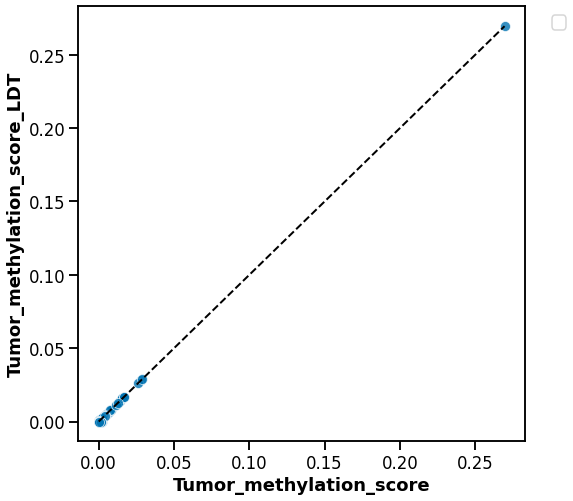

In [134]:
g = sns.scatterplot(data=new_post_tb_mrd_all_cols_df_sample_level, 
                    x=f"Tumor_methylation_score", y="Tumor_methylation_score_LDT", 
                    # hue="pred_type", 
                    # style="methyl_ratio_changed",
                    alpha=0.8, s=100
                   )
# g.set_xlabels("methyl_score_ratio_expanded", clear_inner=False)
# g.set_ylabels("mr_score", clear_inner=False)
upper_limit = max(new_post_tb_mrd_all_cols_df_sample_level[f"Tumor_methylation_score"].max(), 
                 new_post_tb_mrd_all_cols_df_sample_level["Tumor_methylation_score_LDT"].max())
lower_limit = min(new_post_tb_mrd_all_cols_df_sample_level[f"Tumor_methylation_score"].min(), 
                 new_post_tb_mrd_all_cols_df_sample_level["Tumor_methylation_score_LDT"].min())
plt.plot([lower_limit, upper_limit], [lower_limit, upper_limit], linewidth=2, color="black", linestyle="dashed")
# [lower_limit, upper_limit]

# plt.xscale("log")
# plt.yscale("log")

# plt.xlim(0.0001, 1)
# plt.ylim(0.0001, 1)

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", ncol=1, fontsize="medium", title="")

figure = plt.gcf()
figure.set_size_inches(8, 8)

In [135]:
new_post_tb_mrd_all_cols_df_sample_level["methyl_hyper_pos_highcg_count"].min()

3.0

In [136]:
os.getcwd()

'/ghess/pharma/projects/sirius_pharma/cohort_reports/20231218_NOC01_batch1_2/summary'

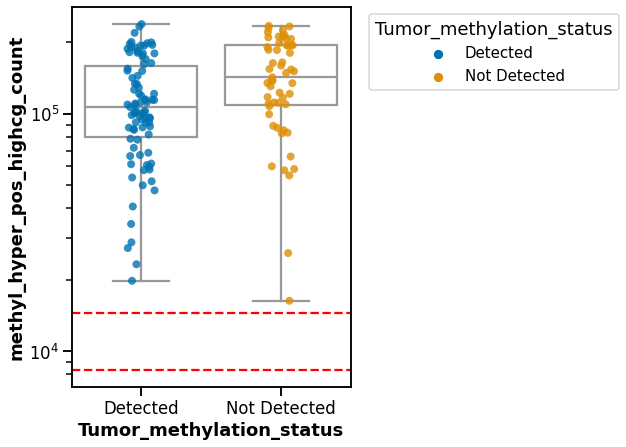

In [137]:
g = sns.boxplot(x="Tumor_methylation_status", y="methyl_hyper_pos_highcg_count", color="white",
                data=new_post_tb_mrd_all_cols_df_sample_level, showfliers = False)
g = sns.stripplot(data=new_post_tb_mrd_all_cols_df_sample_level, 
                  x="Tumor_methylation_status",
                  y="methyl_hyper_pos_highcg_count",
                  hue="Tumor_methylation_status",
                  alpha=0.8, s=8)

g.set(yscale="log")
g.axhline(8327, ls="--", color="r")
g.axhline(14502, ls="--", color="r")
# g.set(ylabel='Somatic variant count')

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", ncol=1, fontsize="small", title="Tumor_methylation_status")

figure = plt.gcf()
figure.set_size_inches(5, 7)
plt.savefig(f"methyl_hyper_pos_highcg_count.png", bbox_inches="tight", dpi=300, facecolor="white", transparent=False)

In [138]:
new_post_tb_mrd_all_cols_df_sample_level["methyl_neg_capture"].min()

0.0

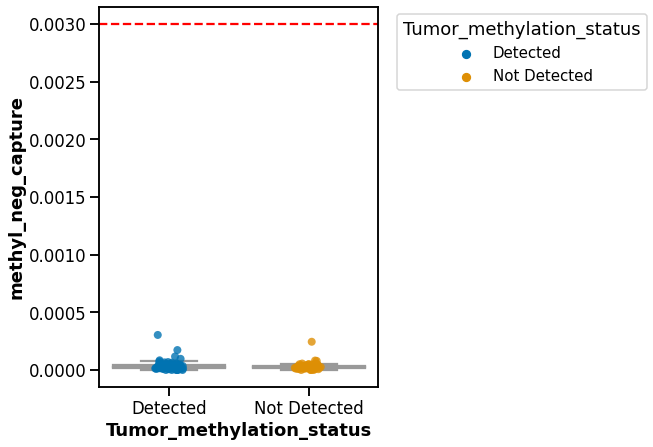

In [139]:
g = sns.boxplot(x="Tumor_methylation_status", y="methyl_neg_capture", color="white",
                data=new_post_tb_mrd_all_cols_df_sample_level, showfliers = False)
g = sns.stripplot(data=new_post_tb_mrd_all_cols_df_sample_level, 
                  x="Tumor_methylation_status",
                  y="methyl_neg_capture",
                  hue="Tumor_methylation_status",
                  alpha=0.8, s=8)

# g.set(yscale="log")
g.axhline(0.003, ls="--", color="r")
# g.set(ylabel='Somatic variant count')

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", ncol=1, fontsize="small", title="Tumor_methylation_status")

figure = plt.gcf()
figure.set_size_inches(5, 7)
plt.savefig(f"methyl_neg_capture.png", bbox_inches="tight", dpi=300, facecolor="white", transparent=False)

In [140]:
new_post_tb_mrd_all_cols_df_sample_level["methyl_pos_capture_max"].min()

1.0

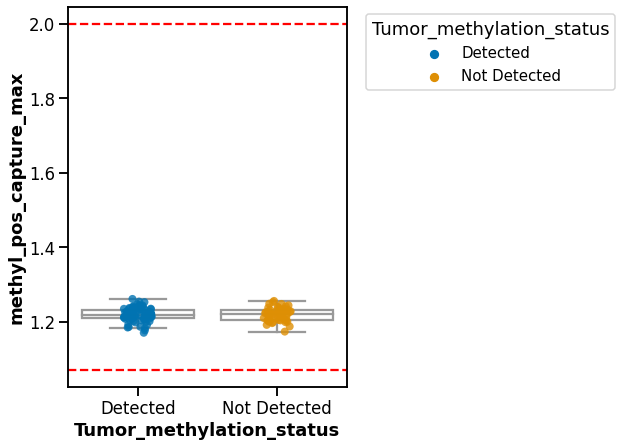

In [141]:
g = sns.boxplot(x="Tumor_methylation_status", y="methyl_pos_capture_max", color="white",
                data=new_post_tb_mrd_all_cols_df_sample_level, showfliers = False)
g = sns.stripplot(data=new_post_tb_mrd_all_cols_df_sample_level, 
                  x="Tumor_methylation_status",
                  y="methyl_pos_capture_max",
                  hue="Tumor_methylation_status",
                  alpha=0.8, s=8)

# g.set(yscale="log")
g.axhline(1.07, ls="--", color="r")
g.axhline(2, ls="--", color="r")
# g.set(ylabel='Somatic variant count')

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", ncol=1, fontsize="small", title="Tumor_methylation_status")

figure = plt.gcf()
figure.set_size_inches(5, 7)
plt.savefig(f"methyl_pos_capture_max.png", bbox_inches="tight", dpi=300, facecolor="white", transparent=False)

In [142]:
low_pos_capture_samp_lst = new_post_tb_mrd_all_cols_df_sample_level.query('methyl_pos_capture_max < 1.07')["GHSampleID"].tolist()
print(len(low_pos_capture_samp_lst))
print(low_pos_capture_samp_lst)

2
['B00236422', 'B00236429']


In [143]:
# are they already covered by methyl_hyper_pos_highcg_count?
low_hyper_pos_highcg_samp_lst = new_post_tb_mrd_all_cols_df_sample_level.query('methyl_hyper_pos_highcg_count < 7000')["GHSampleID"].tolist()
print(len(low_hyper_pos_highcg_samp_lst))
print(low_hyper_pos_highcg_samp_lst)

12
['B00234214', 'B00235323', 'B00235319', 'B00235341', 'B00235337', 'B00236441', 'B00236422', 'B00236424', 'B00236425', 'B00236429', 'B00244536', 'B00244529']


In [144]:
new_post_tb_mrd_all_cols_df_sample_level.query('GHSampleID in @low_pos_capture_samp_lst')

,Patient_ID,Visit_name,GHRequestID,GHSampleID,Sample_status,Sample_comment,Tumor_methylation_status,Tumor_methylation_score,methyl_hyper_pos_highcg_count,methyl_neg_capture,methyl_pos_capture_max,Tumor_methylation_score_LDT,methyl_score_LDT,cfDNA_ng_yield,Bloodcoll_date,chry_nonsingleton,sample_contamination_pct,contam_vscore,estimated_contam_level
200,400400007,BASELINE,A0590650,B00236422,SUCCESS,Methylation Suppression Warning,NaN,NaN,3.0,0.0,1.0,0.0,-8.07075,10.335,2020-09-10,0.0,0.01,1.0,0.00580
214,400400013,RESTAGING #2,A0590659,B00236429,SUCCESS,Methylation Suppression Warning,NaN,NaN,9.0,0.0,1.0,0.0,-8.07075,36.725,2021-11-16,0.0,0.02,1.0,0.00071


No handles with labels found to put in legend.


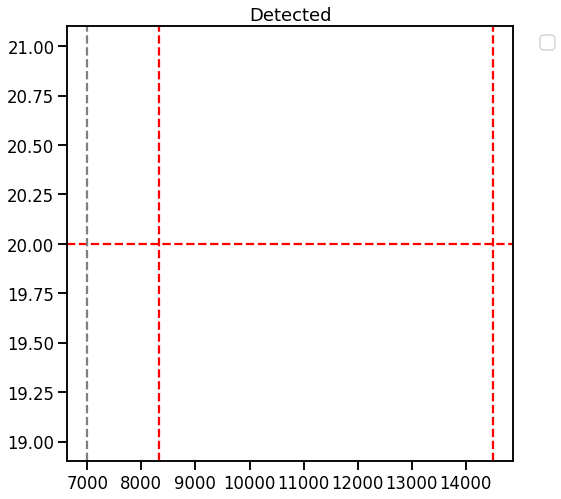

In [145]:
g = sns.scatterplot(data=new_post_tb_mrd_all_cols_df_sample_level.query('Tumor_methylation_status == "Detected" & \
  methyl_hyper_pos_highcg_count < 14502'), 
                    x="methyl_hyper_pos_highcg_count", y="methyl_score_LDT",
                    # hue="pred_type", 
                    # style="methyl_ratio_changed",
                    alpha=0.8, s=100
                   )
# g.set_xlabels("methyl_score_ratio_expanded", clear_inner=False)
# g.set_ylabels("mr_score", clear_inner=False)
# upper_limit = max(comp_methyl_call_ruo_vs_ldt_breast_plot["Methylation_score_RUO_Aggregated"].max(), 
#                  comp_methyl_call_ruo_vs_ldt_breast_plot["Methylation_score_LDT_BREAST"].max())
# plt.plot([1e-7, upper_limit], [1e-7, upper_limit], linewidth=2, color="black", linestyle="dashed")

# plt.xscale("log")
# plt.yscale("log")

# plt.xlim(0.0001, 1)
# plt.ylim(0.0001, 1)
g.set_title("Detected")

g.axhline(20, ls="--", color="r")
g.axvline(14502, ls="--", color="r")
g.axvline(8327, ls="--", color="r")
g.axvline(7000, ls="--", color="grey")
# sns.move_legend(g, "lower center", bbox_to_anchor=(.5, 1), ncol=3, frameon=True)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", ncol=1, fontsize="medium", title="")

figure = plt.gcf()
figure.set_size_inches(8, 8)
plt.savefig(f"methyl_hyper_pos_highcg_count_vs_methyl_score_{cancer_type}_LDT.png", bbox_inches="tight", dpi=300, facecolor="white", transparent=False)

No handles with labels found to put in legend.


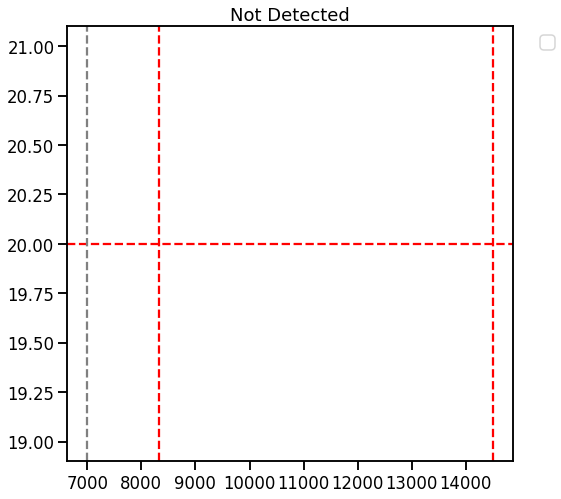

In [146]:
g = sns.scatterplot(data=new_post_tb_mrd_all_cols_df_sample_level.query('Tumor_methylation_status == "Not Detected" & \
  methyl_hyper_pos_highcg_count < 14502'), 
                    x="methyl_hyper_pos_highcg_count", y="methyl_score_LDT",
                    # hue="pred_type", 
                    # style="methyl_ratio_changed",
                    alpha=0.8, s=100
                   )
# g.set_xlabels("methyl_score_ratio_expanded", clear_inner=False)
# g.set_ylabels("mr_score", clear_inner=False)
# upper_limit = max(comp_methyl_call_ruo_vs_ldt_breast_plot["Methylation_score_RUO_Aggregated"].max(), 
#                  comp_methyl_call_ruo_vs_ldt_breast_plot["Methylation_score_LDT_BREAST"].max())
# plt.plot([1e-7, upper_limit], [1e-7, upper_limit], linewidth=2, color="black", linestyle="dashed")

# plt.xscale("log")
# plt.yscale("log")

# plt.xlim(0.0001, 1)
# plt.ylim(0.0001, 1)
g.set_title("Not Detected")
g.axhline(20, ls="--", color="r")
g.axvline(14502, ls="--", color="r")
g.axvline(8327, ls="--", color="r")
g.axvline(7000, ls="--", color="grey")
# sns.move_legend(g, "lower center", bbox_to_anchor=(.5, 1), ncol=3, frameon=True)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", ncol=1, fontsize="medium", title="")

figure = plt.gcf()
figure.set_size_inches(8, 8)
plt.savefig(f"methyl_hyper_pos_highcg_count_vs_methyl_score_{cancer_type}_LDT_not_detected.png", bbox_inches="tight", dpi=300, facecolor="white", transparent=False)

In [147]:
to_check_sample_level = new_post_tb_mrd_all_cols_df_sample_level.query('methyl_score_LDT < 20 & methyl_hyper_pos_highcg_count >= 8327 & \
  methyl_hyper_pos_highcg_count < 14502 & Tumor_methylation_status == "Detected"')
display(to_check_sample_level)

for patient_id in to_check_sample_level["Patient_ID"]:
  display(new_post_tb_mrd_all_cols_df_sample_level.query('Patient_ID == @patient_id').sort_values(by=["Bloodcoll_date"]))

,Patient_ID,Visit_name,GHRequestID,GHSampleID,Sample_status,Sample_comment,Tumor_methylation_status,Tumor_methylation_score,methyl_hyper_pos_highcg_count,methyl_neg_capture,methyl_pos_capture_max,Tumor_methylation_score_LDT,methyl_score_LDT,cfDNA_ng_yield,Bloodcoll_date,chry_nonsingleton,sample_contamination_pct,contam_vscore,estimated_contam_level


In [148]:
# For a sample with methyl_hyper_pos_highcg_count < 14502:
# If LDT Tumor_methylation_status == “Not Detected” AND methyl_hyper_pos_highcg_count < 14502, → FAIL due to “Methylation Fail”
# If LDT Tumor_methylation_status == “Detected” AND methyl_hyper_pos_highcg_count in [8327, 14502), → SUCCESS with “Methylation Suppression Warning”
# If LDT Tumor_methylation_status == “Detected” AND methyl_hyper_pos_highcg_count in [x=7000, 8327) AND methyl_score_LR >= 20, → SUCCESS with “Methylation Suppression Warning”
# Otherwise, → FAIL due to “Methylation Fail”

In [149]:
new_post_tb_mrd_all_cols_df_sample_level[["Sample_status", "Sample_comment"]].value_counts(dropna=False)

Sample_status  Sample_comment                                                                                                      
SUCCESS        NaN                                                                                                                     138
               Low Diversity Warning; Methylation Suppression Warning                                                                    6
               Methylation Suppression Warning                                                                                           4
               Low Diversity Warning                                                                                                     3
               Low Diversity Warning; GC Bias Warning; Unusual Coverage Profile Warning; Methylation Suppression Warning                 1
               Low Diversity Warning; Methylation Suppression Warning; Methylation Bias Warning                                          1
               Low Diversity Warni

In [150]:
new_post_tb_mrd_all_cols_df_sample_level.query('Tumor_methylation_status == "Not Detected"')[["Sample_status", "Sample_comment"]].value_counts(dropna=False)


Sample_status  Sample_comment       
SUCCESS        NaN                      54
               Low Diversity Warning     1
dtype: int64

In [151]:
new_post_tb_mrd_all_cols_df_sample_level.query('Tumor_methylation_status == "Detected"')[["Sample_status", "Sample_comment"]].value_counts(dropna=False)

Sample_status  Sample_comment                
SUCCESS        NaN                               84
               Low Diversity Warning              2
               Possible Contamination Warning     1
dtype: int64

In [152]:
# keep new_post_tb_mrd_all_cols_df intact in case
updated_new_post_tb_mrd_all_cols_df = new_post_tb_mrd_all_cols_df.copy()

In [153]:
new_methyl_fail_rule_1 = (updated_new_post_tb_mrd_all_cols_df["Tumor_methylation_status"] != "Detected") & \
  (updated_new_post_tb_mrd_all_cols_df["methyl_hyper_pos_highcg_count"] < 14502)

new_methyl_fail_rule_2 = (updated_new_post_tb_mrd_all_cols_df["Tumor_methylation_status"] == "Detected") & \
  (updated_new_post_tb_mrd_all_cols_df["methyl_hyper_pos_highcg_count"] < 7000)

updated_new_post_tb_mrd_all_cols_df.loc[new_methyl_fail_rule_1 | new_methyl_fail_rule_2, "Sample_status"] = "FAIL"
updated_new_post_tb_mrd_all_cols_df.loc[new_methyl_fail_rule_1 | new_methyl_fail_rule_2, "Sample_comment"] = "Methylation Fail"
updated_new_post_tb_mrd_all_cols_df.loc[new_methyl_fail_rule_1 | new_methyl_fail_rule_2, "Tumor_methylation_status"] = np.nan

new_methyl_warning_rule_1 = (updated_new_post_tb_mrd_all_cols_df["Tumor_methylation_status"] == "Detected") & \
  (updated_new_post_tb_mrd_all_cols_df["methyl_hyper_pos_highcg_count"] >= 8327) & \
  (updated_new_post_tb_mrd_all_cols_df["methyl_hyper_pos_highcg_count"] < 14502)

new_methyl_warning_rule_2 = (updated_new_post_tb_mrd_all_cols_df["Tumor_methylation_status"] == "Detected") & \
  (updated_new_post_tb_mrd_all_cols_df["methyl_hyper_pos_highcg_count"] >= 7000) & \
  (updated_new_post_tb_mrd_all_cols_df["methyl_hyper_pos_highcg_count"] < 8327) & \
  (updated_new_post_tb_mrd_all_cols_df["methyl_score_LDT"] >= 20)

updated_new_post_tb_mrd_all_cols_df.loc[new_methyl_warning_rule_1 | new_methyl_warning_rule_2, "Sample_comment"] = "Methylation Suppression Warning"

In [154]:
print(sum(new_methyl_fail_rule_1))
print(sum(new_methyl_fail_rule_2))
print(sum(new_methyl_warning_rule_1))
print(sum(new_methyl_warning_rule_2))

sum((updated_new_post_tb_mrd_all_cols_df["methyl_hyper_pos_highcg_count"] < 14502) & \
  (updated_new_post_tb_mrd_all_cols_df["methyl_hyper_pos_highcg_count"] >= 8327) & \
  (updated_new_post_tb_mrd_all_cols_df["Tumor_methylation_status"] != "Detected"))


18
0
0
0


0

In [155]:
updated_new_post_tb_mrd_all_cols_df.to_csv("updated_new_post_tb_mrd_all_cols_df_checkpoint1.csv", index=False)

In [157]:
updated_new_post_tb_mrd_all_cols_df_sample_level = updated_new_post_tb_mrd_all_cols_df[["Patient_ID", "Visit_name", "GHRequestID", "GHSampleID", "Sample_status", "Sample_comment",
                                                      "Tumor_methylation_status", "Tumor_methylation_score", 
                                                      "methyl_hyper_pos_highcg_count", "methyl_neg_capture", "methyl_pos_capture_max",
                                                      "Tumor_methylation_score_LDT", "methyl_score_LDT", "cfDNA_ng_yield",
                                                      "Bloodcoll_date", "chry_nonsingleton", "sample_contamination_pct",
                                                     "contam_vscore", "estimated_contam_level"]].drop_duplicates()
updated_new_post_tb_mrd_all_cols_df_sample_level["Bloodcoll_date"] = pd.to_datetime(updated_new_post_tb_mrd_all_cols_df_sample_level["Bloodcoll_date"])

updated_new_post_tb_mrd_all_cols_df_sample_level.shape

(155, 19)

In [158]:
contam_warning_sample_level = updated_new_post_tb_mrd_all_cols_df_sample_level.query('Sample_comment==Sample_comment & \
  Sample_comment.str.contains("Possible Contamination Warning")', engine="python")
contam_warning_sample_level.shape

(1, 19)

In [161]:
to_check_contam_warning_sample_level = contam_warning_sample_level.query('Tumor_methylation_status == "Detected"')

for patient_id in to_check_contam_warning_sample_level["Patient_ID"]:
    temp_sample_query = updated_new_post_tb_mrd_all_cols_df_sample_level.query('Patient_ID == @patient_id').sort_values(by=["Bloodcoll_date"])
    temp_sample_query = temp_sample_query.sort_values(by='contam_vscore', ascending=False)
    display(temp_sample_query)
    temp_id = temp_sample_query.GHSampleID.values[0]
    print(f"{temp_id} contam_vscore = {temp_sample_query.contam_vscore.values[0]}.")
    print(f"methyl_score_LDT = {temp_sample_query.methyl_score_LDT.values[0]}, Tumor_methylation_score_LDT = {temp_sample_query.Tumor_methylation_score_LDT.values[0]}.")
    print(f"Tumor_methylation_score = {temp_sample_query.Tumor_methylation_score.values[0]}, estimated_contam_level = {temp_sample_query.estimated_contam_level.values[0]}.")
    print(f"Donor Tumor frac.: {round( (temp_sample_query.Tumor_methylation_score_LDT.values[0] / temp_sample_query.estimated_contam_level.values[0]) * 100, 2)}%")
    print(f"https://bifs.ghdna.io{rerun_input_df.loc[rerun_input_df['sample_id'] == temp_id].fc_name.values[0]}/{temp_id}/{temp_id}.oncotrack.report.pdf")


,Patient_ID,Visit_name,GHRequestID,GHSampleID,Sample_status,Sample_comment,Tumor_methylation_status,Tumor_methylation_score,methyl_hyper_pos_highcg_count,methyl_neg_capture,methyl_pos_capture_max,Tumor_methylation_score_LDT,methyl_score_LDT,cfDNA_ng_yield,Bloodcoll_date,chry_nonsingleton,sample_contamination_pct,contam_vscore,estimated_contam_level
176,1001050042,RESTAGING #2,A0590781,B00234989,SUCCESS,Possible Contamination Warning,Detected,0.269494,163550.0,0.000018,1.23952,0.269494,24.18774,90.350,2021-12-01,0.0,0.03,172.0,0.17711
174,1001050042,BASELINE,A0590780,B00234987,SUCCESS,NaN,Detected,0.002322,180742.0,0.000022,1.21917,0.002322,13.57405,33.995,2021-03-31,0.0,0.02,1.0,0.00050


B00234989 contam_vscore = 172.0.
methyl_score_LDT = 24.18774, Tumor_methylation_score_LDT = 0.269494.
Tumor_methylation_score = 0.2694937392179013, estimated_contam_level = 0.17711.
Donor Tumor frac.: 152.16%
https://bifs.ghdna.io/ghds/omni_v2/flowcells/221201_A01902_0046_BHJYVNDSX5_PROD135_AP2.Sirius-1.0.0-RLS/B00234989/B00234989.oncotrack.report.pdf


In [ ]:
B00234989 contam_vscore = 172.0.
methyl_score_LDT = 24.18774, Tumor_methylation_score_LDT = 0.269494.
Tumor_methylation_score = 0.2694937392179013, estimated_contam_level = 0.17711.
Donor Tumor frac.: 152.16%
https://bifs.ghdna.io/ghds/omni_v2/flowcells/221201_A01902_0046_BHJYVNDSX5_PROD135_AP2.Sirius-1.0.0-RLS/B00234989/B00234989.oncotrack.report.pdf
# MAF plot all over the place. FAIL


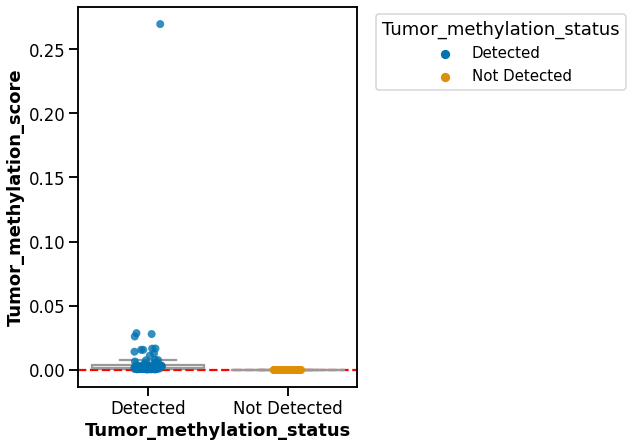

In [162]:
g = sns.boxplot(x="Tumor_methylation_status", y="Tumor_methylation_score", color="white",
                data=updated_new_post_tb_mrd_all_cols_df_sample_level, showfliers = False)
g = sns.stripplot(data=updated_new_post_tb_mrd_all_cols_df_sample_level, 
                  x="Tumor_methylation_status",
                  y="Tumor_methylation_score", # methyl_score_LDT
                  hue="Tumor_methylation_status",
                  alpha=0.8, s=8)

# g.set(yscale="log")
g.axhline(0, ls="--", color="r")
# g.set(ylabel='Somatic variant count')

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", ncol=1, fontsize="small", title="Tumor_methylation_status")

figure = plt.gcf()
figure.set_size_inches(5, 7)
# plt.savefig(f"methyl_pos_capture_max.png", bbox_inches="tight", dpi=300, facecolor="white", transparent=False)

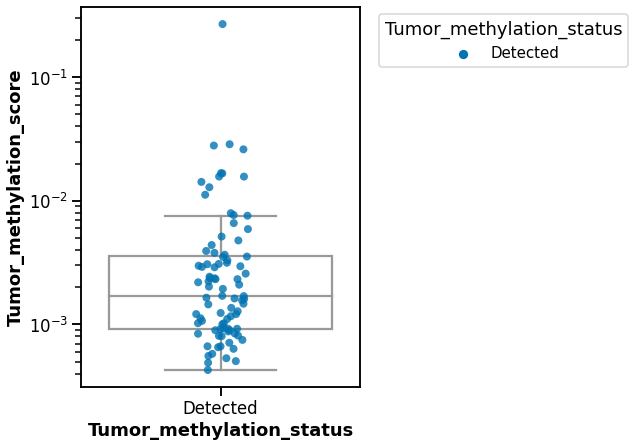

In [163]:
g = sns.boxplot(x="Tumor_methylation_status", y="Tumor_methylation_score", color="white",
                data=updated_new_post_tb_mrd_all_cols_df_sample_level.query('Tumor_methylation_status == "Detected"'), showfliers = False)
g = sns.stripplot(data=updated_new_post_tb_mrd_all_cols_df_sample_level.query('Tumor_methylation_status == "Detected"'), 
                  x="Tumor_methylation_status",
                  y="Tumor_methylation_score",
                  hue="Tumor_methylation_status",
                  alpha=0.8, s=8)

g.set(yscale="log")
g.axhline(0, ls="--", color="r")
# g.set(ylabel='Somatic variant count')

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", ncol=1, fontsize="small", title="Tumor_methylation_status")

figure = plt.gcf()
figure.set_size_inches(5, 7)
# plt.savefig(f"methyl_pos_capture_max.png", bbox_inches="tight", dpi=300, facecolor="white", transparent=False)

In [25]:
df = pd.read_csv(f"/ghsfa/projects/pharma/projects/sirius_pharma/cohort_reports/20231218_NOC01_batch1_2/post_tb/NOC01_IST01_12072022_post_tb_tb_changed_all_cols_MRD.csv",)

In [164]:
updated_new_post_tb_mrd_all_cols_df_sample_level.query('Tumor_methylation_status == "Detected"')["methyl_score_LDT"].describe()


count    87.000000
mean      6.628924
std      10.224302
min     -11.378570
25%      -2.198365
50%       6.395470
75%      14.803650
max      28.585510
Name: methyl_score_LDT, dtype: float64

In [165]:
updated_new_post_tb_mrd_all_cols_df_sample_level.query('Tumor_methylation_status == "Detected" & methyl_score_LDT < 1')

,Patient_ID,Visit_name,GHRequestID,GHSampleID,Sample_status,Sample_comment,Tumor_methylation_status,Tumor_methylation_score,methyl_hyper_pos_highcg_count,methyl_neg_capture,methyl_pos_capture_max,Tumor_methylation_score_LDT,methyl_score_LDT,cfDNA_ng_yield,Bloodcoll_date,chry_nonsingleton,sample_contamination_pct,contam_vscore,estimated_contam_level
3,1001000004,BASELINE,A0590720,B00234205,SUCCESS,NaN,Detected,0.001107,106700.0,0.000066,1.18562,0.000000,-1.36516,14.3000,2018-09-04,0.0,0.02,0.0,0.00000
4,1001000004,RESTAGING #2,A0590721,B00234207,SUCCESS,NaN,Detected,0.000634,133451.0,0.000015,1.22348,0.000000,-2.90297,18.0700,2019-03-21,0.0,0.01,0.0,0.00000
16,1001000009,RESTAGING #2,A0590727,B00234211,SUCCESS,NaN,Detected,0.000749,92043.0,0.000304,1.20158,0.000000,-11.37145,12.2850,2019-08-20,0.0,0.01,0.0,0.00000
17,1001000010,BASELINE,A0590728,B00234171,SUCCESS,NaN,Detected,0.001609,100372.0,0.000040,1.19227,0.000000,-5.07818,14.6900,2018-12-19,1.0,0.02,1.0,0.00142
18,1001000010,RESTAGING #2,A0590729,B00234172,SUCCESS,NaN,Detected,0.001237,114758.0,0.000035,1.20756,0.000000,-6.56298,16.4450,2019-08-02,0.0,0.02,2.0,0.00328
36,1001040016,BASELINE,A0590738,B00234187,SUCCESS,NaN,Detected,0.000899,144536.0,0.000028,1.17654,0.000899,0.50727,23.2050,2019-04-10,0.0,0.02,0.0,0.00000
43,1001040019,BASELINE,A0590744,B00234200,SUCCESS,NaN,Detected,0.001452,59860.0,0.000050,1.18615,0.000000,-6.88538,9.5550,2019-05-17,0.0,0.02,0.0,0.00000
59,1001040026,RESTAGING #2,A0590755,B00234177,SUCCESS,NaN,Detected,0.000578,233007.0,0.000056,1.23326,0.000000,-2.50198,74.1000,2020-03-11,0.0,0.02,5.0,0.00159
69,400400017,BASELINE,A0590666,B00235336,SUCCESS,NaN,Detected,0.000917,85651.0,0.000012,1.21497,0.000000,-6.22107,13.3250,2021-06-09,0.0,0.02,0.0,0.00000
73,400400020,BASELINE,A0590670,B00235312,SUCCESS,NaN,Detected,0.000664,102760.0,0.000117,1.22071,0.000000,-0.50578,14.4950,2021-07-27,0.0,0.01,9.0,0.00064


# samples missed by RUO contam cutoff (contamination score within [10,50], methylation score < 5 and methylation positive)

In [166]:
to_check_contam_missed_warning_sample_level = updated_new_post_tb_mrd_all_cols_df_sample_level.query(
  'Tumor_methylation_status == "Detected" & methyl_score_LDT < 5 & contam_vscore >=10 & contam_vscore < 50')
to_check_contam_missed_warning_sample_level.shape


(1, 19)

In [167]:
to_check_contam_warning_sample_level["GHSampleID"]

176    B00234989
Name: GHSampleID, dtype: object

In [168]:
to_check_contam_missed_warning_sample_level

,Patient_ID,Visit_name,GHRequestID,GHSampleID,Sample_status,Sample_comment,Tumor_methylation_status,Tumor_methylation_score,methyl_hyper_pos_highcg_count,methyl_neg_capture,methyl_pos_capture_max,Tumor_methylation_score_LDT,methyl_score_LDT,cfDNA_ng_yield,Bloodcoll_date,chry_nonsingleton,sample_contamination_pct,contam_vscore,estimated_contam_level
122,3003040022,BASELINE,A0590698,B00235325,SUCCESS,NaN,Detected,0.000931,98741.0,0.00003,1.2106,0.0,-5.10018,18.07,2021-07-06,0.0,0.02,24.0,0.00144


In [169]:
for patient_id in to_check_contam_missed_warning_sample_level["Patient_ID"]:
    temp_sample_query = updated_new_post_tb_mrd_all_cols_df_sample_level.query('Patient_ID == @patient_id').sort_values(by=["Bloodcoll_date"])
    temp_sample_query = temp_sample_query.sort_values(by='contam_vscore', ascending=False)
    display(temp_sample_query)
    temp_id = temp_sample_query.GHSampleID.values[0]
    print(f"{temp_id} contam_vscore = {temp_sample_query.contam_vscore.values[0]}.")
    print(f"methyl_score_LDT = {temp_sample_query.methyl_score_LDT.values[0]}, Tumor_methylation_score_LDT = {temp_sample_query.Tumor_methylation_score_LDT.values[0]}.")
    print(f"Tumor_methylation_score = {temp_sample_query.Tumor_methylation_score.values[0]}, estimated_contam_level = {temp_sample_query.estimated_contam_level.values[0]}.")
    print(f"Donor Tumor frac.: {round( (temp_sample_query.Tumor_methylation_score_LDT.values[0] / temp_sample_query.estimated_contam_level.values[0]) * 100, 2)}%")
    print(f"https://bifs.ghdna.io{rerun_input_df.loc[rerun_input_df['sample_id'] == temp_id].fc_name.values[0]}/{temp_id}/{temp_id}.oncotrack.report.pdf")


,Patient_ID,Visit_name,GHRequestID,GHSampleID,Sample_status,Sample_comment,Tumor_methylation_status,Tumor_methylation_score,methyl_hyper_pos_highcg_count,methyl_neg_capture,methyl_pos_capture_max,Tumor_methylation_score_LDT,methyl_score_LDT,cfDNA_ng_yield,Bloodcoll_date,chry_nonsingleton,sample_contamination_pct,contam_vscore,estimated_contam_level
122,3003040022,BASELINE,A0590698,B00235325,SUCCESS,NaN,Detected,0.000931,98741.0,0.00003,1.21060,0.0,-5.10018,18.070,2021-07-06,0.0,0.02,24.0,0.00144
223,3003040022,RESTAGING #2,A0590699,B00244527,SUCCESS,Low Diversity Warning,Not Detected,0.000000,25905.0,0.00000,1.20336,0.0,-7.71658,3.991,2022-03-17,0.0,0.01,5.0,0.00314


B00235325 contam_vscore = 24.0.
methyl_score_LDT = -5.10018, Tumor_methylation_score_LDT = 0.0.
Tumor_methylation_score = 0.0009312096901782, estimated_contam_level = 0.00144.
Donor Tumor frac.: 0.0%
https://bifs.ghdna.io/ghds/omni_v2/flowcells/221201_A01810_0056_BHJYLVDSX5_PROD135_AP3.Sirius-1.0.0-RLS/B00235325/B00235325.oncotrack.report.pdf


In [170]:
# MAF plot looks ok, passing

In [171]:
samp_lst_warning = to_check_contam_warning_sample_level["GHSampleID"]

print(samp_lst_warning)

176    B00234989
Name: GHSampleID, dtype: object


In [172]:
new_methyl_fail_rule_contam = updated_new_post_tb_mrd_all_cols_df["GHSampleID"].isin(['B00234989'])

updated_new_post_tb_mrd_all_cols_df.loc[new_methyl_fail_rule_contam, "Sample_status"] = "FAIL"
updated_new_post_tb_mrd_all_cols_df.loc[new_methyl_fail_rule_contam, "Sample_comment"] = "Possible Contamination"
updated_new_post_tb_mrd_all_cols_df.loc[new_methyl_fail_rule_contam, "Tumor_methylation_status"] = np.nan

In [173]:
updated_new_post_tb_mrd_all_cols_df.Sample_comment.unique()

array([nan, 'Methylation Fail', 'Low Diversity Warning',
       'Possible Contamination'], dtype=object)

In [174]:
updated_new_post_tb_mrd_all_cols_df.shape

(230, 69)

# 6. Clean up

In [175]:
os.getcwd()

'/ghess/pharma/projects/sirius_pharma/cohort_reports/20231218_NOC01_batch1_2/summary'

In [176]:
batch_df.head()

,Study ID,Patient ID,Customer Sample ID,Sample Time point,Sample Collection Date,plasma_volume_manifest,Sample Type,Cancer Type,Cancer Stage,requeststudyid,customerpatientid,visitname,customersampleid,accn_id,requestcreatedt,bloodcolldate,sample_received_date,cancerother,cancerstage,run_sample_id,Request_ID,index,index2,Description,Index Name,fc_dir,WellId,plasma_volume_observed,plasma_volume_remaining,plasma_volume,cfDNA_ng,Batch_ID,new_Cancertype,new_Cancer_Type_in_Cohort,new_Cancer_Type_Standardized
0,NO CUT,4004000001,4004000001-BASELINE,BASELINE,Jun-22-2020,6.0,Plasma,rectal cancer,NaN,NO CUT,4004000001,BASELINE,4004000001-BASELINE,A0590638,10/08/2022,06/22/2020,10/06/2022,rectal cancer,NaN,B00234320,A0590638,TAACGTGATA,AGGTCCCACG,Shortened_Targeted_SEQ:Unknown:Pharma,EIO_PlateG_H11,/ghds/omni_v2/flowcells/221129_A01810_0054_BHJYK3DSX5_PROD134_AP3.Sirius-1.0.0-RLS,H11,4.0,1.0,4.0,13.455,PROD-134,rectal cancer,rectal cancer,CRC
1,NO CUT,1001000002,1001000002-BASELINE,BASELINE,Jun-07-2018,6.0,Plasma,rectal cancer,NaN,NO CUT,1001000002,BASELINE,1001000002-BASELINE,A0590718,10/08/2022,06/07/2018,10/06/2022,rectal cancer,NaN,B00234194,A0590718,TTCGACTAGC,CTTGGCGCTT,Shortened_Targeted_SEQ:Unknown:Pharma,EIO_PlateG_G6,/ghds/omni_v2/flowcells/221129_A01907_0029_BHJYKGDSX5_PROD134_AP2.Sirius-1.0.0-RLS,G6,4.0,1.0,4.0,9.815,PROD-134,rectal cancer,rectal cancer,CRC
2,NO CUT,1001000002,1001000002-RESTAGING #2,RESTAGING #2,Dec-21-2018,6.0,Plasma,rectal cancer,NaN,NO CUT,1001000002,RESTAGING #2,1001000002-RESTAGING #2,A0590719,10/08/2022,12/21/2018,10/06/2022,rectal cancer,NaN,B00234192,A0590719,CTATCGTTGC,AGCCAGAGAG,Shortened_Targeted_SEQ:Unknown:Pharma,EIO_PlateG_H6,/ghds/omni_v2/flowcells/221129_A01907_0029_BHJYKGDSX5_PROD134_AP2.Sirius-1.0.0-RLS,H6,4.0,1.0,4.0,13.195,PROD-134,rectal cancer,rectal cancer,CRC
3,NO CUT,1001000004,1001000004-BASELINE,BASELINE,Sep-04-2018,6.0,Plasma,rectal cancer,NaN,NO CUT,1001000004,BASELINE,1001000004-BASELINE,A0590720,10/08/2022,09/04/2018,10/06/2022,rectal cancer,NaN,B00234205,A0590720,GCCAGTTCAG,AAAGTCTTTG,Shortened_Targeted_SEQ:Unknown:Pharma,EIO_PlateG_A7,/ghds/omni_v2/flowcells/221129_A01907_0029_BHJYKGDSX5_PROD134_AP2.Sirius-1.0.0-RLS,A7,4.0,1.0,4.0,14.300,PROD-134,rectal cancer,rectal cancer,CRC
4,NO CUT,1001000004,1001000004-RESTAGING #2,RESTAGING #2,Mar-21-2019,6.0,Plasma,rectal cancer,NaN,NO CUT,1001000004,RESTAGING #2,1001000004-RESTAGING #2,A0590721,10/08/2022,03/21/2019,10/06/2022,rectal cancer,NaN,B00234207,A0590721,TTGGTGTCAC,ACTAGCGACA,Shortened_Targeted_SEQ:Unknown:Pharma,EIO_PlateG_B7,/ghds/omni_v2/flowcells/221129_A01907_0029_BHJYKGDSX5_PROD134_AP2.Sirius-1.0.0-RLS,B7,4.5,1.0,4.5,18.070,PROD-134,rectal cancer,rectal cancer,CRC


In [177]:
# special maneuver to add in patient IDs again:
updated_new_post_tb_mrd_all_cols_df = updated_new_post_tb_mrd_all_cols_df.merge(batch_df[["Request_ID", "Patient ID"]],
                                                       left_on=["GHRequestID"],
                                                       right_on=["Request_ID"],
                                                       how="left")
updated_new_post_tb_mrd_all_cols_df = updated_new_post_tb_mrd_all_cols_df.drop(columns=["Request_ID", "Patient_ID"]).rename(columns={"Patient ID":"Patient_ID"})

In [178]:
print(updated_new_post_tb_mrd_all_cols_df.shape)
print(batch_df.shape)

(233, 69)
(155, 35)


In [179]:
from datetime import date

def remove_genomic_warning(status, comment):
  """ drop genomic warning(s) from Sample_comment (when MRD module is turned on) """
  if pd.isna(comment) or comment == "" or status != "SUCCESS":
    return comment
  comment_lst = comment.split("; ")
  new_comment_lst = [i for i in comment_lst if i == "Methylation Suppression Warning"]
  new_comment_str = "; ".join(map(str, new_comment_lst))
  return new_comment_str


prefix_output = f"{cohort_dir}_{post_dir}_tb_changed"
mrd_batch_dat = updated_new_post_tb_mrd_all_cols_df.copy()


mrd_batch_dat["Percentage"] = mrd_batch_dat["maf"]*100
mrd_batch_dat["Somatic_variant_reportable"] = np.where(((mrd_batch_dat["Tumor_methylation_status"] != "Detected") | (mrd_batch_dat["Chromosome"].isna())), 
                                                       "No", "Yes")
mrd_batch_dat["Tumor_genomic_status"] = np.where((mrd_batch_dat["grs_call"]==1) | (mrd_batch_dat["Somatic_variant_reportable"]=="Yes"), "Detected", "Not Detected")
mrd_batch_dat["ctDNA_detected"] = mrd_batch_dat["Tumor_methylation_status"]
# mrd_batch_dat.rename(columns={
#   'type':'Variant_type', 'indel_type':'Indel_type', 'gene':'Gene', 'chrom':'Chromosome', 'pos':'Position', 'reporting_exon':'Exon', 
#   'mut_aa':'Mut_aa', 'mut_nt':'Mut_nt', 'cdna':'Mut_cdna', 'transcript_id':'Transcript', 'splice':'Splice_effect', 
#   'cosmic':'COSMIC', 'dbsnp':'dbSNP', 'tot_cnt':'Mol_count', "Cancer Stage": "Tumor_stage", "cfDNA_ng": "cfDNA_ng_yield"}, inplace=True)
mrd_batch_dat = mrd_batch_dat.replace(np.nan,'',regex=True)
mrd_batch_dat = mrd_batch_dat.replace("snv",'SNV',regex=True)
mrd_batch_dat = mrd_batch_dat.replace("indel",'Indel',regex=True)
mrd_batch_dat = mrd_batch_dat.replace("complex",'Complex',regex=True)
mrd_batch_dat["Reported_date"] = date.today().strftime("%m/%d/%Y")

# For those FAIL samples, clean up those columns below
for col in ["ctDNA_detected", "Tumor_methylation_status", "Tumor_genomic_status", "Tumor_methylation_score", "Somatic_variant_reportable"]:
  mrd_batch_dat.loc[mrd_batch_dat["Sample_status"] == "FAIL", [col]] = ""

# mrd_batch_dat = mrd_batch_dat.sort_values(by="GHSampleID")
mrd_batch_dat.to_csv(f"{prefix_output}_all_cols_MRD.csv", index=False)

# For those ctDNA_detected=="Not Detected" samples, clean up those columns below
tgs_no_to_clean = (mrd_batch_dat["Sample_status"] == "FAIL") | \
  (mrd_batch_dat["ctDNA_detected"] == "Not Detected") & (mrd_batch_dat["Chromosome"] != "") 
for col in ["Variant_type","Indel_type","Gene","Chromosome","Position","Exon","Mut_aa","Mut_nt","Mut_cdna","Transcript","Percentage",
          "Splice_effect","COSMIC","dbSNP","Mol_count"]:
  mrd_batch_dat.loc[tgs_no_to_clean, [col]] = ""

final_cols=["Study_ID", "Customer_SampleID", "GHRequestID", "GHSampleID", "Patient_ID", "Cancertype", "Tumor_stage", "Visit_name", 
            "Sample_status", "Sample_comment", 
            "ctDNA_detected", "Tumor_methylation_status", "Tumor_methylation_score", "Somatic_variant_reportable", "Variant_type", 
            "Indel_type", "Gene", "Chromosome", "Position", "Exon", "Mut_aa", "Mut_nt", "Mut_cdna", "Transcript", "Percentage", "Splice_effect", "COSMIC", 
            "dbSNP", "Mol_count", "cfDNA_ng_yield", "Plasma_ml_input", "Plasma_ml_remaining", "Received_date", "Bloodcoll_date", "Reported_date"]

mrd_batch_dat_order = mrd_batch_dat[final_cols].drop_duplicates()
mrd_batch_dat_order["Sample_comment"] = mrd_batch_dat_order.apply(lambda x: remove_genomic_warning(x["Sample_status"], x["Sample_comment"]), axis=1)
mrd_batch_dat_order.to_csv(f"{prefix_output}_RUO_report_MRD.csv", index=False)


def line_prepender(filename, line):
  """ prepend a line to the beginning of a file """
  with open(filename, 'r+') as f:
    content = f.read()
    f.seek(0, 0)
    f.write(line.rstrip('\r\n') + '\n' + content)

num_samples = mrd_batch_dat_order["GHSampleID"].nunique()
ruo_line = f"Number of samples = {num_samples},BIP Version: Sirius-1.1.1-RLS, MafBand_method" + ","*(mrd_batch_dat_order.shape[1]-3)
line_prepender(f"{prefix_output}_RUO_report_MRD.csv", ruo_line)

In [180]:
print(mrd_batch_dat_order.shape)
display(mrd_batch_dat_order.head())
print(mrd_batch_dat_order.Sample_status.value_counts())

(224, 35)


,Study_ID,Customer_SampleID,GHRequestID,GHSampleID,Patient_ID,Cancertype,Tumor_stage,Visit_name,Sample_status,Sample_comment,ctDNA_detected,Tumor_methylation_status,Tumor_methylation_score,Somatic_variant_reportable,Variant_type,Indel_type,Gene,Chromosome,Position,Exon,Mut_aa,Mut_nt,Mut_cdna,Transcript,Percentage,Splice_effect,COSMIC,dbSNP,Mol_count,cfDNA_ng_yield,Plasma_ml_input,Plasma_ml_remaining,Received_date,Bloodcoll_date,Reported_date
0,NO CUT,4004000001-BASELINE,A0590638,B00234320,4004000001,rectal cancer,,BASELINE,SUCCESS,,Detected,Detected,0.001121,Yes,SNV,,KRAS,12.0,25398284.0,2.0,G12D,C>T,c.35G>A,NM_004985.5,1.0607,,COSV55497369,rs121913529,2026.0,13.455,4.0,1.0,10/06/2022,2020-06-22,12/20/2023
1,NO CUT,1001000002-BASELINE,A0590718,B00234194,1001000002,rectal cancer,,BASELINE,SUCCESS,,Detected,Detected,0.00236,Yes,SNV,,KRAS,12.0,25398284.0,2.0,G12D,C>T,c.35G>A,NM_004985.5,0.988003,,COSV55497369,rs121913529,1564.0,9.815,4.0,1.0,10/06/2022,2018-06-07,12/20/2023
2,NO CUT,1001000002-RESTAGING #2,A0590719,B00234192,1001000002,rectal cancer,,RESTAGING #2,SUCCESS,,Not Detected,Not Detected,0.0,No,,,,,,,,,,,,,,,,13.195,4.0,1.0,10/06/2022,2018-12-21,12/20/2023
3,NO CUT,1001000004-BASELINE,A0590720,B00234205,1001000004,rectal cancer,,BASELINE,SUCCESS,,Detected,Detected,0.001107,Yes,SNV,,KRAS,12.0,25398284.0,2.0,G12D,C>T,c.35G>A,NM_004985.5,1.09472,,COSV55497369,rs121913529,2329.0,14.300,4.0,1.0,10/06/2022,2018-09-04,12/20/2023
4,NO CUT,1001000004-RESTAGING #2,A0590721,B00234207,1001000004,rectal cancer,,RESTAGING #2,SUCCESS,,Detected,Detected,0.000634,Yes,SNV,,KRAS,12.0,25398284.0,2.0,G12D,C>T,c.35G>A,NM_004985.5,0.825206,,COSV55497369,rs121913529,2812.0,18.070,4.5,1.0,10/06/2022,2019-03-21,12/20/2023


SUCCESS    210
FAIL        14
Name: Sample_status, dtype: int64


In [181]:
print(mrd_batch_dat_order.GHSampleID.nunique())
print(mrd_batch_dat_order.Patient_ID.nunique())

155
77


In [182]:
sample_level_mrd_batch_dat_order = mrd_batch_dat_order[["GHRequestID", "GHSampleID", "Patient_ID", "Visit_name", "Sample_status", 
                           "Tumor_methylation_status", "Tumor_methylation_score", "Bloodcoll_date", "Sample_comment"]].drop_duplicates()

print(mrd_batch_dat_order[["Sample_status", "Sample_comment"]].value_counts(dropna=False))
print(sample_level_mrd_batch_dat_order[["Sample_status", "Sample_comment"]].value_counts(dropna=False))

Sample_status  Sample_comment        
SUCCESS                                  210
FAIL           Methylation Fail           13
               Possible Contamination      1
dtype: int64
Sample_status  Sample_comment        
SUCCESS                                  141
FAIL           Methylation Fail           13
               Possible Contamination      1
dtype: int64


In [183]:
success_detected = mrd_batch_dat_order.query('Sample_status == "SUCCESS" & Tumor_methylation_status == "Detected"')["GHSampleID"].nunique()
success_notDetected = mrd_batch_dat_order.query('Sample_status == "SUCCESS" & Tumor_methylation_status != "Detected"')["GHSampleID"].nunique()
detection_rate = success_detected / (success_detected + success_notDetected)

print(f"success detected: {success_detected}")
print(f"success not detected: {success_notDetected}")
print(f"detection rate: {detection_rate}")

success detected: 86
success not detected: 55
detection rate: 0.6099290780141844


In [184]:
print((86+55)/155)
print((86+55))

0.9096774193548387
141


In [39]:
df = pd.read_csv(f"/ghsfa/projects/pharma/projects/sirius_pharma/cohort_reports/20231218_NOC01_batch1_2/post_tb/NOC01_IST01_12072022_post_tb_tb_changed_all_cols_MRD.csv",)
df.columns

Index(['Study_ID', 'Customer_SampleID', 'GHRequestID', 'GHSampleID',
       'Patient_ID', 'Cancertype', 'Tumor_stage', 'Visit_name',
       'Sample_status', 'Sample_comment', 'Tumor_methylation_status',
       'Tumor_methylation_score', 'cfDNA_ng_yield', 'Plasma_ml_input',
       'Plasma_ml_remaining', 'Received_date', 'Bloodcoll_date',
       'Reported_date', 'fc_dir', 'runid', 'new_Cancertype',
       'Cancer_Type_in_Cohort', 'Cancer_Type_Standardized',
       'new_Cancer_Type_in_Cohort', 'new_Cancer_Type_Standardized',
       'sample_id_x', 'max_maf', 'max_maf_gene', 'max_maf_mut_aa',
       'max_maf_tvf_comment_multitumor', 'tvf_call', 'Variant_type',
       'Indel_type', 'Gene', 'Chromosome', 'Position', 'Exon', 'Mut_aa',
       'Mut_nt', 'Mut_cdna', 'Transcript', 'maf', 'Splice_effect', 'COSMIC',
       'dbSNP', 'Mol_count', 'sample_id_y', 'tvf_comment_multitumor',
       'run_sample_id', 'tumor_type', 'genomic_risk_score', 'grs_threshold',
       'grs_call', 'bi_details', 'Perce

In [40]:
df_1 = df.drop_duplicates(subset=["GHSampleID"])
df_1.shape

(155, 58)

In [38]:
df_2 = df_1[df_1["cfDNA_ng_yield"] < 5]
df_2.shape

(14, 58)

In [41]:
df_3 = df_1[df_1["Plasma_ml_input"] < 2]
df_3

,Study_ID,Customer_SampleID,GHRequestID,GHSampleID,Patient_ID,Cancertype,Tumor_stage,Visit_name,Sample_status,Sample_comment,Tumor_methylation_status,Tumor_methylation_score,cfDNA_ng_yield,Plasma_ml_input,Plasma_ml_remaining,Received_date,Bloodcoll_date,Reported_date,fc_dir,runid,new_Cancertype,Cancer_Type_in_Cohort,Cancer_Type_Standardized,new_Cancer_Type_in_Cohort,new_Cancer_Type_Standardized,sample_id_x,max_maf,max_maf_gene,max_maf_mut_aa,max_maf_tvf_comment_multitumor,tvf_call,Variant_type,Indel_type,Gene,Chromosome,Position,Exon,Mut_aa,Mut_nt,Mut_cdna,Transcript,maf,Splice_effect,COSMIC,dbSNP,Mol_count,sample_id_y,tvf_comment_multitumor,run_sample_id,tumor_type,genomic_risk_score,grs_threshold,grs_call,bi_details,Percentage,Somatic_variant_reportable,Tumor_genomic_status,ctDNA_detected
228,NO CUT,3003-040025 Baseline,A0617386,B00244548,3003080025,rectal cancer,II/III,BASALINE,SUCCESS,NaN,Detected,0.001277,9.62,1.5,0.0,11/23/2022,08/31/2021,12/20/2023,/ghds/omni_v2/flowcells/221205_A01810_0058_AHJYLYDSX5_PROD143_AP3.Sirius-1.0.0-RLS,221205_A01810_0058_AHJYLYDSX5,rectal cancer,rectal cancer,CRC,rectal cancer,CRC,NaN,0.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B00244548,CRC,3.676443,7.437,0,"{""grs_super_whitelist"": 0, ""tvf_call"": 0}",NaN,No,Not Detected,Detected


In [186]:
merged_qc_mrd_batch_dat_order = mrd_batch_dat_order.merge(ruo_qc_df, on=["GHSampleID"], how="left")
merged_qc_mrd_batch_dat_order.shape

(224, 45)

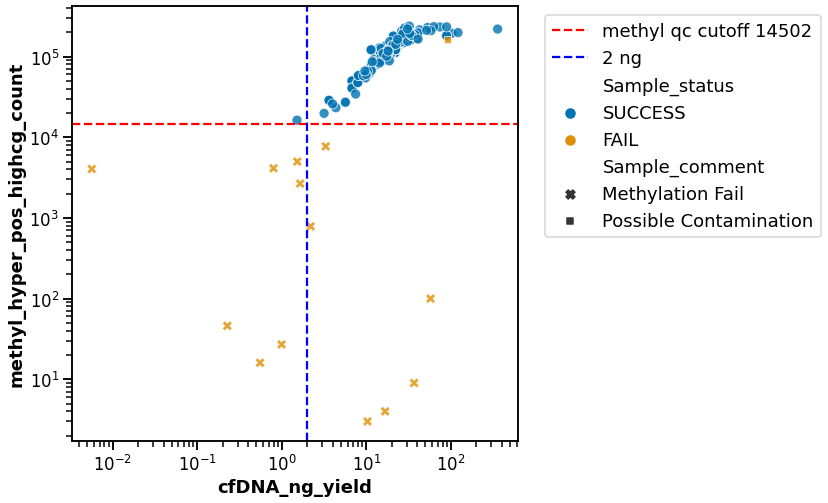

In [187]:
g = sns.scatterplot(data=merged_qc_mrd_batch_dat_order.fillna(""), 
                    x="cfDNA_ng_yield", y="methyl_hyper_pos_highcg_count", 
                    hue="Sample_status", 
                    style="Sample_comment",
                    alpha=0.8, s=100
                   )
# g.set_xlabels("methyl_score_ratio_expanded", clear_inner=False)
# g.set_ylabels("mr_score", clear_inner=False)
# upper_limit = max(new_post_tb_mrd_all_cols_df_sample_level["methyl_score_breast_lr"].max(), 
#                  new_post_tb_mrd_all_cols_df_sample_level["methyl_score_LDT"].max())
# lower_limit = min(new_post_tb_mrd_all_cols_df_sample_level["methyl_score_breast_lr"].min(), 
#                  new_post_tb_mrd_all_cols_df_sample_level["methyl_score_LDT"].min())
# plt.plot([lower_limit, upper_limit], [lower_limit, upper_limit], linewidth=2, color="black", linestyle="dashed")

# plt.xscale("log")
# plt.yscale("log")

# plt.xlim(0.0001, 1)
# plt.ylim(0.0001, 1)

g.set(yscale="log", xscale="log")
# g.axhline(8724, ls="dashed", color="black", label="methyl qc cutoff 14502")
g.axhline(14502, ls="dashed", color="r", label="methyl qc cutoff 14502")
g.axvline(2, ls="dashed", color="b", label="2 ng")

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", ncol=1, fontsize="medium", title="")

figure = plt.gcf()
figure.set_size_inches(8, 8)
plt.savefig("yield_vs_methyl_hyper_pos_highcg_count_all.png", bbox_inches="tight", dpi=300, facecolor="white", transparent=False)

In [189]:
other_emfst = pd.read_csv('/ghess/pharma/projects/sirius_pharma/manifest/SampleManifest_22sep2022_NOC01_IST01.csv')

In [190]:
other_emfst.head()

,Study ID,Patient ID,Customer Tube ID,Customer Sample ID,Sample Time point,Sample Collection Date (MMM-DD-YYYY),Sample Type,Sample Subtype,Estimated Quantity,Quantity Units,Cancer Type,(Nof1) Cancer Type,Cancer Stage,Tumor Type,Patient age at Sample Collection,Patient Year of Birth (YYYY),Patient Sex,Patient Pregnancy / Transplant history,Patient Treatment Information,Investigator / PI,Site Number,Comments
0,NO CUT,4004000001,P5792,4004000001-BASELINE,BASELINE,Jun-22-2020,Plasma,NaN,1.5,ml,rectal cancer,rectal cancer,NaN,CRC,46,1974,M,NaN,NaN,Zampino,4004,Stage II/III
1,NO CUT,4004000001,P5793,4004000001-BASELINE,BASELINE,Jun-22-2020,Plasma,NaN,1.5,ml,rectal cancer,rectal cancer,NaN,CRC,46,1974,M,NaN,NaN,Zampino,4004,Stage II/III
2,NO CUT,4004000001,P5794,4004000001-BASELINE,BASELINE,Jun-22-2020,Plasma,NaN,1.5,ml,rectal cancer,rectal cancer,NaN,CRC,46,1974,M,NaN,NaN,Zampino,4004,Stage II/III
3,NO CUT,4004000001,P5795,4004000001-BASELINE,BASELINE,Jun-22-2020,Plasma,NaN,1.5,ml,rectal cancer,rectal cancer,NaN,CRC,46,1974,M,NaN,NaN,Zampino,4004,Stage II/III
4,NO CUT,4004000001,P62348,4004000001-RESTAGING #2,RESTAGING #2,Jan-21-2021,Plasma,NaN,1.5,ml,rectal cancer,rectal cancer,NaN,CRC,47,1974,M,NaN,NaN,Zampino,4004,Stage II/III


In [192]:
mrd_batch_dat_order.head()

,Study_ID,Customer_SampleID,GHRequestID,GHSampleID,Patient_ID,Cancertype,Tumor_stage,Visit_name,Sample_status,Sample_comment,ctDNA_detected,Tumor_methylation_status,Tumor_methylation_score,Somatic_variant_reportable,Variant_type,Indel_type,Gene,Chromosome,Position,Exon,Mut_aa,Mut_nt,Mut_cdna,Transcript,Percentage,Splice_effect,COSMIC,dbSNP,Mol_count,cfDNA_ng_yield,Plasma_ml_input,Plasma_ml_remaining,Received_date,Bloodcoll_date,Reported_date
0,NO CUT,4004000001-BASELINE,A0590638,B00234320,4004000001,rectal cancer,,BASELINE,SUCCESS,,Detected,Detected,0.001121,Yes,SNV,,KRAS,12.0,25398284.0,2.0,G12D,C>T,c.35G>A,NM_004985.5,1.0607,,COSV55497369,rs121913529,2026.0,13.455,4.0,1.0,10/06/2022,2020-06-22,12/20/2023
1,NO CUT,1001000002-BASELINE,A0590718,B00234194,1001000002,rectal cancer,,BASELINE,SUCCESS,,Detected,Detected,0.00236,Yes,SNV,,KRAS,12.0,25398284.0,2.0,G12D,C>T,c.35G>A,NM_004985.5,0.988003,,COSV55497369,rs121913529,1564.0,9.815,4.0,1.0,10/06/2022,2018-06-07,12/20/2023
2,NO CUT,1001000002-RESTAGING #2,A0590719,B00234192,1001000002,rectal cancer,,RESTAGING #2,SUCCESS,,Not Detected,Not Detected,0.0,No,,,,,,,,,,,,,,,,13.195,4.0,1.0,10/06/2022,2018-12-21,12/20/2023
3,NO CUT,1001000004-BASELINE,A0590720,B00234205,1001000004,rectal cancer,,BASELINE,SUCCESS,,Detected,Detected,0.001107,Yes,SNV,,KRAS,12.0,25398284.0,2.0,G12D,C>T,c.35G>A,NM_004985.5,1.09472,,COSV55497369,rs121913529,2329.0,14.300,4.0,1.0,10/06/2022,2018-09-04,12/20/2023
4,NO CUT,1001000004-RESTAGING #2,A0590721,B00234207,1001000004,rectal cancer,,RESTAGING #2,SUCCESS,,Detected,Detected,0.000634,Yes,SNV,,KRAS,12.0,25398284.0,2.0,G12D,C>T,c.35G>A,NM_004985.5,0.825206,,COSV55497369,rs121913529,2812.0,18.070,4.5,1.0,10/06/2022,2019-03-21,12/20/2023


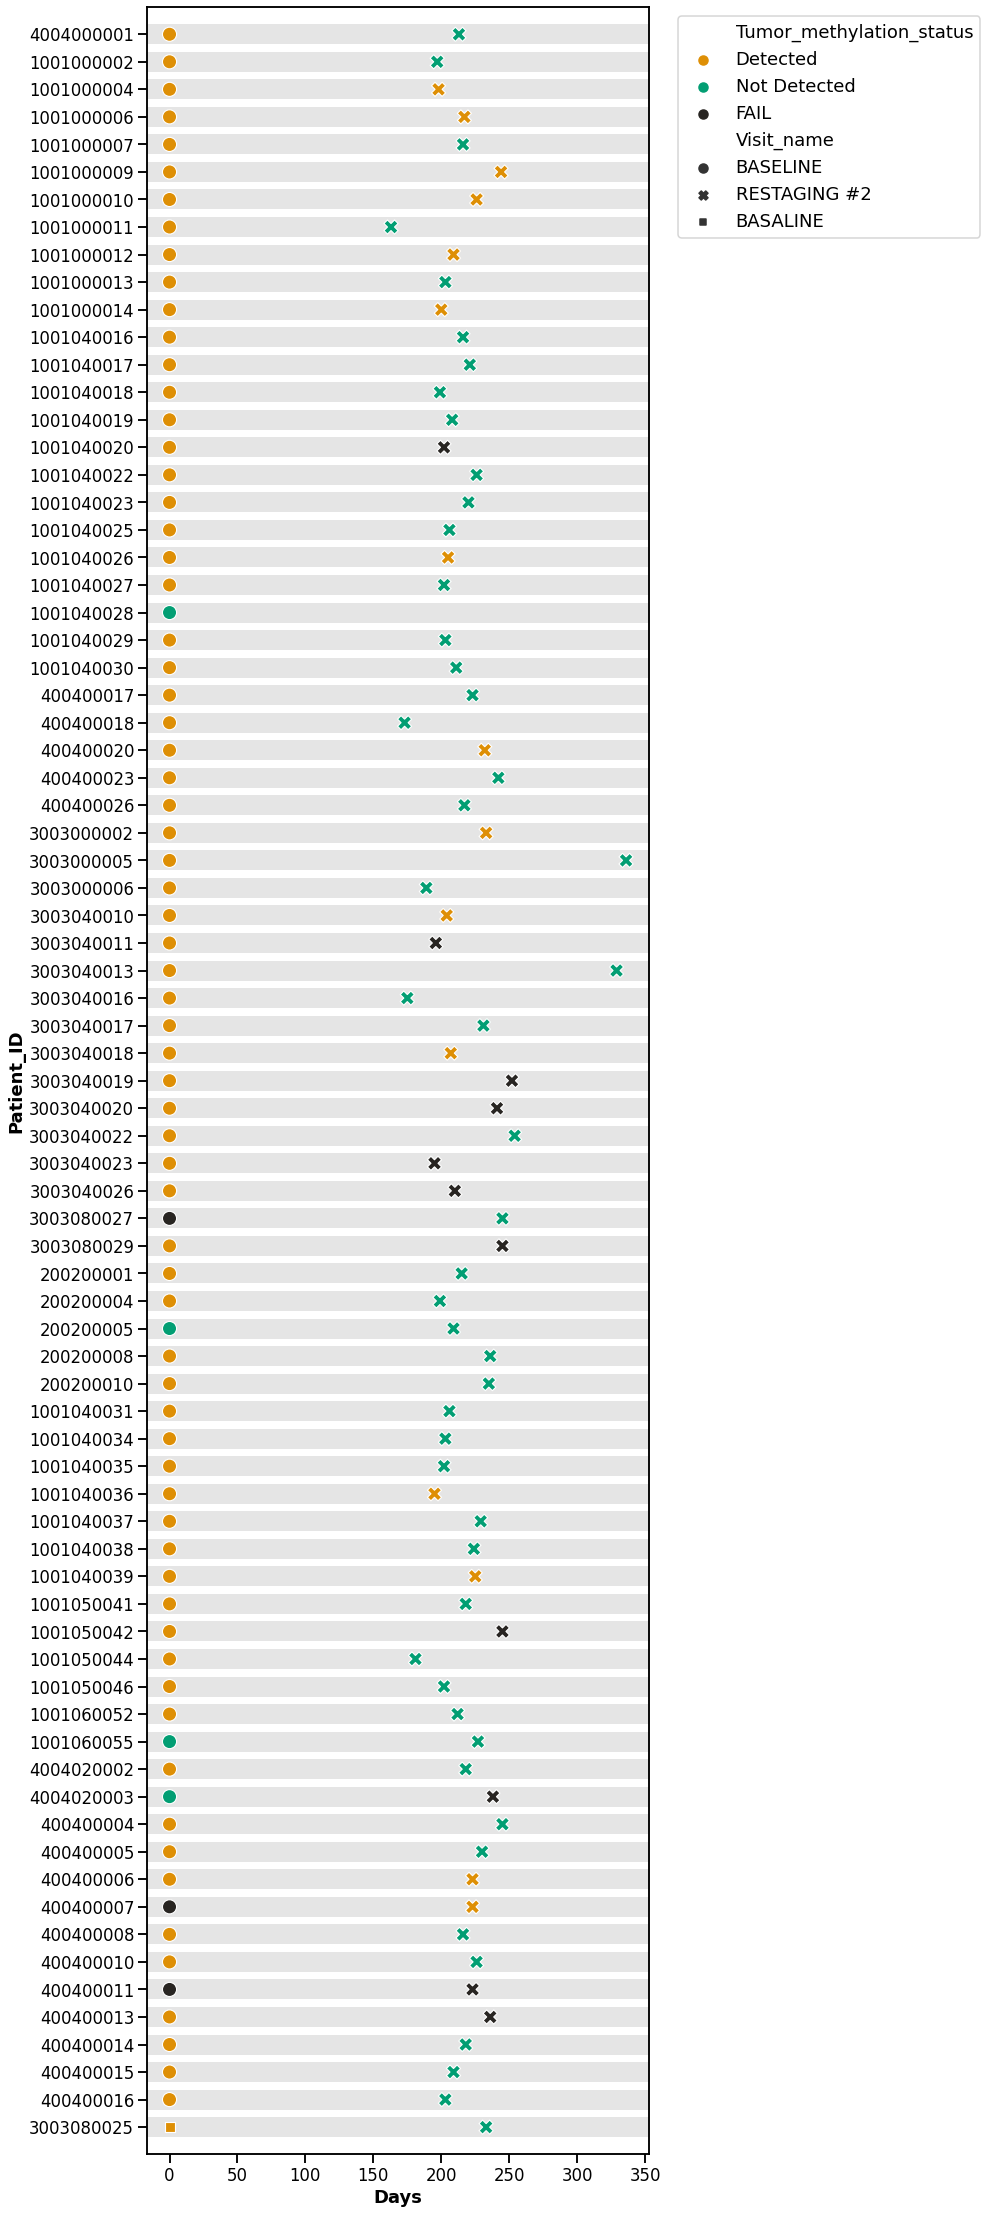

In [193]:
batch_patient_df = mrd_batch_dat_order.copy()
sample_level_report_batch_patient_df = batch_patient_df[["GHRequestID", "GHSampleID", "Patient_ID", "Visit_name", "Sample_status", 
                           "Tumor_methylation_status", "Tumor_methylation_score", "Bloodcoll_date"]].drop_duplicates()
sample_level_report_batch_patient_df["Bloodcoll_date"] = pd.to_datetime(sample_level_report_batch_patient_df["Bloodcoll_date"])
# sample_level_report_batch_patient_df["Patient_ID"] = sample_level_report_batch_patient_df["Patient_ID"].astype(str)
sample_level_report_batch_patient_df["Patient_ID"] = sample_level_report_batch_patient_df["Patient_ID"].astype(str)
sample_level_report_batch_patient_df.loc[sample_level_report_batch_patient_df["Sample_status"] != "SUCCESS", "Tumor_methylation_status"] = "FAIL"

baseline_timepoint_batch_patient_df = sample_level_report_batch_patient_df.groupby(["Patient_ID"])["Bloodcoll_date"].min().to_frame().reset_index()
sample_level_report_batch_patient_df = sample_level_report_batch_patient_df.merge(
    baseline_timepoint_batch_patient_df, on=["Patient_ID"], how="left", suffixes = ("_curr", "_baseline"))
sample_level_report_batch_patient_df["interval"] = (sample_level_report_batch_patient_df["Bloodcoll_date_curr"] - sample_level_report_batch_patient_df["Bloodcoll_date_baseline"]).dt.days
sample_level_report_batch_patient_df = sample_level_report_batch_patient_df.query('interval == interval')

# if len(sample_level_report_batch_patient_df) == 0:
#     return None

plt.clf()
ax = sns.scatterplot(data = sample_level_report_batch_patient_df, y = "Patient_ID", x = "interval", 
                   hue = "Tumor_methylation_status", 
                   palette = {"Detected": sns.color_palette("colorblind")[1],
                             "Not Detected": sns.color_palette("colorblind")[2],
                             "FAIL": sns.dark_palette("xkcd:golden")[0],
                             "NA": sns.color_palette("colorblind")[7]},
                   style = "Visit_name",
                   s=200
              )
ax.grid(axis='y', color="grey", alpha=0.2, lw=20)
ax.set_axisbelow(True)
plt.xlabel("Days")
plt.margins(y=1/batch_patient_df["Patient_ID"].nunique())
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", ncol=1, fontsize="medium", title="")

figure = plt.gcf()
figure.set_size_inches(9, max(6, (batch_patient_df["Patient_ID"].nunique())/2+1))
plt.savefig("patient_journey.png", bbox_inches="tight", dpi=300, facecolor="white", transparent=False)